import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import datetime
%matplotlib inline


from datetime import date
from datetime import timedelta
from dateutil.relativedelta import relativedelta

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

pd.options.display.max_columns = None


## Import Data

#Import Main Table
MAIN_MASTER = pd.read_excel('Source Data Thailand HR.xlsx','TH workforce')

#Import Entry Date
ENTRY_MASTER = pd.read_excel('Source Data Thailand HR.xlsx','Hiring date')

#Import Ed Allowance
EDU_ALLOW_MASTER = pd.read_excel('Source Data Thailand HR.xlsx','Education allowance')

#Import House Loan
HOUSE_MASTER = pd.read_excel('Source Data Thailand HR.xlsx','Housing Loan')

#Import Education
EDU_MASTER = pd.read_excel('Source Data Thailand HR.xlsx','Education')

#Import Vacation
VAC_MASTER = pd.read_excel('Source Data Thailand HR.xlsx','Absence')

*****************************************************************************************************

In [1705]:
# Dump data

In [1706]:
MAIN = MAIN_MASTER.copy()
MAIN.set_index('Serial Number', inplace=True)

In [1707]:
ENTRY = ENTRY_MASTER.copy()
ENTRY.set_index('Serial Number', inplace=True)

In [1708]:
EDU_ALLOW = EDU_ALLOW_MASTER.copy()
EDU_ALLOW.set_index('Serial Number', inplace=True)

In [1709]:
HOUSE = HOUSE_MASTER.copy()
HOUSE.set_index('Serial Number', inplace=True)

In [1710]:
EDU = EDU_MASTER.copy()
#EDU.set_index('Serial Number', inplace=True)

In [1711]:
VAC = VAC_MASTER.copy()

In [1712]:
MAIN.head()

,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employment Status,Employment Status Text,Chief Designation,A&D Designated Position,Corp Hierarchy Division Code (L0),...,Personnel Action Reason Code,Personnel Action Reason Description,Personnel action - Month,Personnel action - Year,Previous Organization Unit,Previous Organization Abbreviation,Previous Organization Unit Text,Function before withdrawn,BSC Indicator,Outlier - Resigned
Serial Number,,,,,,,,,,,,,,,,,,,,,
1,364.0,M,10,1938,1955-02-01,0,Withdrawn,N,N,NaN,...,N1,Resignation-Non regretted,11,1998,0.0,NaN,NaN,NaN,NaN,NaN
2,NaN,M,3,1942,NaT,0,Withdrawn,N,N,NaN,...,ZZ,Migration Upload,5,1998,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,M,6,1938,NaT,0,Withdrawn,N,N,NaN,...,ZZ,Migration Upload,6,1998,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,F,1,1942,1961-12-01,0,Withdrawn,N,N,NaN,...,N0,Resignation-Regretted,3,2000,0.0,NaN,NaN,NaN,NaN,NaN
5,NaN,M,2,1939,1961-02-01,0,Withdrawn,N,N,NaN,...,N0,Resignation-Regretted,3,2000,80000739.0,THTRMDO8,SALES SUPPORT,NaN,NaN,NaN


In [1713]:
len(MAIN[MAIN['Supervisor Serial'].isnull()])

974

In [1714]:


Columns = MAIN.columns.tolist()
Columns

['Supervisor Serial',
 'Gender',
 'Month of Birth',
 'Year of Birth',
 'Tech Date of Entry',
 'Employment Status',
 'Employment Status Text',
 'Chief Designation',
 'A&D Designated Position',
 'Corp Hierarchy Division Code (L0)',
 'Corp Hierarchy Division Text (L0)',
 'Corp Hierarchy Function Code (L1)',
 'Corp Hierarchy Function Text (L1)',
 'Corp Hierarchy Sub-Function Code (L2)',
 'Corp Hierarchy Sub-Function Text (L2)',
 'Corp Hierarchy Department Code (L3)',
 'Corp Hierarchy Department Text (L3)',
 'Corp Hierarchy Sub-Department Code (L4)',
 'Corp Hierarchy Sub-Department Text (L4)',
 'Corp Hierarchy Section Code (L5)',
 'Corp Hierarchy Section Text (L5)',
 'Career Steward (IT9604)',
 'Career Steward Text (IT9604)',
 'Home Company Code (IT0001)',
 'Company Code Name',
 'Employee Job Type Code',
 'Employee Job Type Text',
 'Personnel Area',
 'Personnel Area Text',
 'Personnel Subarea',
 'Personnel Subarea Text',
 'Employee Group Code',
 'Employee Group Text',
 'Employee Sub Group C

In [1715]:
DropColumns = [
 'Employment Status',
 'Chief Designation',
 'A&D Designated Position',
 'Corp Hierarchy Division Code (L0)',
 'Corp Hierarchy Division Text (L0)',
 'Corp Hierarchy Function Code (L1)',
 'Corp Hierarchy Function Text (L1)',
 'Corp Hierarchy Sub-Function Code (L2)',
 'Corp Hierarchy Sub-Function Text (L2)',
 'Corp Hierarchy Department Code (L3)',
 'Corp Hierarchy Department Text (L3)',
 'Corp Hierarchy Sub-Department Code (L4)',
 'Corp Hierarchy Sub-Department Text (L4)',
 'Corp Hierarchy Section Code (L5)',
 'Corp Hierarchy Section Text (L5)',
 'Career Steward (IT9604)',
 'Career Steward Text (IT9604)',
 'Home Company Code (IT0001)',
 'Company Code Name',
 'Employee Job Type Code',
 'Employee Job Type Text',
 'Personnel Area',
 'Personnel Area Text',
 'Personnel Subarea',
 'Personnel Subarea Text',
 'Employee Group Code',
 'Employee Group Text',
 'Employee Sub Group Code',
 'Organization Unit Code',
 'Organization Unit Abbreviation',
 'Organization Unit Name',
 'Functional Organization (1F)',
 'Functional Organization (1F) Text',
 'Functional Department (1D – IT9504)',
 'Functional Department (1D – IT9504) Text',
 'Headcount Grouping',
 'Headcount Grouping Text',
 'Organization Unit 0',
 'Organization Unit 0 Text',
 'Organization Unit 1',
 'Organization Unit 1 Text',
 'Organization Unit 2',
 'Organization Unit 2 Text',
 'Organization Unit 3',
 'Organization Unit 3 Text',
 'Organization Unit 4',
 'Organization Unit 4 Text',
 'Organization Unit 5',
 'Organization Unit 5 Text',
 'Organization Unit 6',
 'Organization Unit 6 Text',
 'Organization Unit 7',
 'Organization Unit 7 Text',
 'Organization Unit 8',
 'Organization Unit 8 Text',
 'Organization Unit 9',
 'Organization Unit 9 Text',
 'Functional Organization Unit 0',
 'Functional Organization Unit 0 Text',
 'Functional Organization Unit 1',
 'Functional Organization Unit 1 Text',
 'Functional Organization Unit 2',
 'Functional Organization Unit 2 Text',
 'Functional Organization Unit 3',
 'Functional Organization Unit 3 Text',
 'Functional Organization Unit 4',
 'Functional Organization Unit 4 Text',
 'Functional Organization Unit 5',
 'Functional Organization Unit 5 Text',
 'Functional Organization Unit 6',
 'Functional Organization Unit 6 Text',
 'Functional Organization Unit 7',
 'Functional Organization Unit 7 Text',
 'Functional Organization Unit 8',
 'Functional Organization Unit 8 Text',
 'Functional Organization Unit 9',
 'Functional Organization Unit 9 Text',
 'Department (OU)',
 'Department (OU) Text',
 'Home Cost Center (IT0001)',
 'Cost Center Description',
 'Payroll Area',
 'Payroll Area Text',
 'Business Area',
 'Business Area Text',
 'Employee Main Address - City',
 'Employee Main Address - Zip Code',
 'District',
 'Employee Main Address - Country',
 'Work Schedule',
 'Work Schedule Text',
 'Previous Organization Unit',
 'Previous Organization Abbreviation',
 'Previous Organization Unit Text',
 'Function before withdrawn',
 'Outlier - Resigned']

MAIN.drop(DropColumns, axis=1, inplace=True)
MAIN

,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employment Status Text,Employee Sub Group Text,Personnel Action Type Code,Personnel Action Text,Personnel Action Reason Code,Personnel Action Reason Description,Personnel action - Month,Personnel action - Year,BSC Indicator
Serial Number,,,,,,,,,,,,,,
1,364.0,M,10,1938,1955-02-01,Withdrawn,MPT-monthly,31,LEAVE THE COMPANY,N1,Resignation-Non regretted,11,1998,NaN
2,NaN,M,3,1942,NaT,Withdrawn,MPT-monthly,Y4,Withdrawn Chg. (Migration),ZZ,Migration Upload,5,1998,NaN
3,NaN,M,6,1938,NaT,Withdrawn,Non-MPT-monthly,Y4,Withdrawn Chg. (Migration),ZZ,Migration Upload,6,1998,NaN
4,NaN,F,1,1942,1961-12-01,Withdrawn,MPT-monthly,31,LEAVE THE COMPANY,N0,Resignation-Regretted,3,2000,NaN
5,NaN,M,2,1939,1961-02-01,Withdrawn,MPT-monthly,31,LEAVE THE COMPANY,N0,Resignation-Regretted,3,2000,NaN
6,346.0,M,12,1939,1962-02-01,Withdrawn,Non-MPT-monthly,31,LEAVE THE COMPANY,N0,Resignation-Regretted,1,2000,NaN
7,NaN,M,1,1939,1962-03-01,Withdrawn,MPT-monthly,31,LEAVE THE COMPANY,N0,Resignation-Regretted,2,2000,NaN
8,27.0,M,5,1939,1962-03-01,Withdrawn,MPT-monthly,31,LEAVE THE COMPANY,N0,Resignation-Regretted,1,1999,NaN
9,NaN,M,1,1937,NaT,Withdrawn,Non-MPT-monthly,Y4,Withdrawn Chg. (Migration),ZZ,Migration Upload,1,1998,NaN


In [1716]:
MAIN.dtypes

Supervisor Serial                             float64
Gender                                         object
Month of Birth                                  int64
Year of Birth                                   int64
Tech Date of Entry                     datetime64[ns]
Employment Status Text                         object
Employee Sub Group Text                        object
Personnel Action Type Code                     object
Personnel Action Text                          object
Personnel Action Reason Code                   object
Personnel Action Reason Description            object
Personnel action - Month                        int64
Personnel action - Year                         int64
BSC Indicator                                  object
dtype: object

In [1717]:
MAIN['Supervisor Serial'].isnull()

Serial Number
1       False
2        True
3        True
4        True
5        True
6       False
7        True
8       False
9        True
10       True
11      False
12       True
13      False
14       True
15       True
16       True
17       True
18      False
19       True
20       True
21       True
22      False
23       True
24      False
25       True
26      False
27       True
28      False
29      False
30      False
        ...  
5009    False
5010    False
5011    False
5012    False
5013    False
5014    False
5015    False
5016    False
5017    False
5018    False
5019    False
5020    False
5021    False
5022    False
5023    False
5024    False
5025    False
5026     True
5027    False
5028    False
5029    False
5030    False
5031    False
5032    False
5033    False
5034    False
5035    False
5036    False
5037    False
5038    False
Name: Supervisor Serial, dtype: bool

## Define target - Resigned

In [1718]:
MAIN.loc[:,'Action Reason'] = MAIN['Personnel Action Type Code'].astype('str')+'-'+ MAIN['Personnel Action Text'].astype('str')+' : '+ MAIN['Personnel Action Reason Code'].astype('str')+'-'+ MAIN['Personnel Action Reason Description'].astype('str')

In [1719]:
LeaveReason = MAIN['Action Reason'].unique()
sorted(LeaveReason)

['1-ENTRY IN THE COMPANY : 0-Hiring-New position',
 '1-ENTRY IN THE COMPANY : 1-Hiring-Existing position',
 '11-INTERNAL MOVE : 70-Change Company/New Pos.',
 '11-INTERNAL MOVE : 71-Change Company/Exist.Pos.',
 '11-INTERNAL MOVE : 72-Change Pers.Area/New Pos.',
 '11-INTERNAL MOVE : 73-Change Pers.Area/Exist. Pos.',
 '11-INTERNAL MOVE : 74-Change Organization/New Pos.',
 '11-INTERNAL MOVE : 75-Change Organization/Exist Pos.',
 '11-INTERNAL MOVE : 76-Change Position/New Pos.',
 '11-INTERNAL MOVE : 77-Change Position/Exist Pos.',
 '11-INTERNAL MOVE : 82-Reorganization',
 '11-INTERNAL MOVE : ZZ-Technical upload',
 '15-RETURN TO HOME COMPANY : C0-Return home Cy-new position',
 '15-RETURN TO HOME COMPANY : C1-Return home Cy- Existing pos.',
 '21-CHANGE EMPLOYEE SITUATION : E6-Temporary to Regular',
 '21-CHANGE EMPLOYEE SITUATION : G0-Promotion (change in position)',
 '21-CHANGE EMPLOYEE SITUATION : G1-Reclassification',
 '3-RE-ENTRY IN THE COMPANY : 0-Hiring-New position',
 '3-RE-ENTRY IN THE

In [1720]:
DEF_RESIGNED = [
    '31-LEAVE THE COMPANY : N0-Resignation-Regretted',
    '31-LEAVE THE COMPANY : N1-Resignation-Non regretted',
    '31-LEAVE THE COMPANY : N2-Resignation during Prob.Period',
    '31-LEAVE THE COMPANY : N4-Resignation - Just Cause',
]

MAIN.loc[:, 'Resigned'] = 0
MAIN.loc[MAIN['Action Reason'].isin(DEF_RESIGNED), 'Resigned'] = 1

MAIN

,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employment Status Text,Employee Sub Group Text,Personnel Action Type Code,Personnel Action Text,Personnel Action Reason Code,Personnel Action Reason Description,Personnel action - Month,Personnel action - Year,BSC Indicator,Action Reason,Resigned
Serial Number,,,,,,,,,,,,,,,,
1,364.0,M,10,1938,1955-02-01,Withdrawn,MPT-monthly,31,LEAVE THE COMPANY,N1,Resignation-Non regretted,11,1998,NaN,31-LEAVE THE COMPANY : N1-Resignation-Non regr...,1
2,NaN,M,3,1942,NaT,Withdrawn,MPT-monthly,Y4,Withdrawn Chg. (Migration),ZZ,Migration Upload,5,1998,NaN,Y4-Withdrawn Chg. (Migration) : ZZ-Migration U...,0
3,NaN,M,6,1938,NaT,Withdrawn,Non-MPT-monthly,Y4,Withdrawn Chg. (Migration),ZZ,Migration Upload,6,1998,NaN,Y4-Withdrawn Chg. (Migration) : ZZ-Migration U...,0
4,NaN,F,1,1942,1961-12-01,Withdrawn,MPT-monthly,31,LEAVE THE COMPANY,N0,Resignation-Regretted,3,2000,NaN,31-LEAVE THE COMPANY : N0-Resignation-Regretted,1
5,NaN,M,2,1939,1961-02-01,Withdrawn,MPT-monthly,31,LEAVE THE COMPANY,N0,Resignation-Regretted,3,2000,NaN,31-LEAVE THE COMPANY : N0-Resignation-Regretted,1
6,346.0,M,12,1939,1962-02-01,Withdrawn,Non-MPT-monthly,31,LEAVE THE COMPANY,N0,Resignation-Regretted,1,2000,NaN,31-LEAVE THE COMPANY : N0-Resignation-Regretted,1
7,NaN,M,1,1939,1962-03-01,Withdrawn,MPT-monthly,31,LEAVE THE COMPANY,N0,Resignation-Regretted,2,2000,NaN,31-LEAVE THE COMPANY : N0-Resignation-Regretted,1
8,27.0,M,5,1939,1962-03-01,Withdrawn,MPT-monthly,31,LEAVE THE COMPANY,N0,Resignation-Regretted,1,1999,NaN,31-LEAVE THE COMPANY : N0-Resignation-Regretted,1
9,NaN,M,1,1937,NaT,Withdrawn,Non-MPT-monthly,Y4,Withdrawn Chg. (Migration),ZZ,Migration Upload,1,1998,NaN,Y4-Withdrawn Chg. (Migration) : ZZ-Migration U...,0


In [1721]:
#Drop records of Withdrawn : Migration Upload
UNIDENTIFY = [
    'Y4-Withdrawn Chg. (Migration) : ZZ-Migration Upload',
]

DROP_RECORDS = MAIN[MAIN['Action Reason'].isin(UNIDENTIFY)].index.tolist()
len(DROP_RECORDS)

210

In [1722]:
MAIN.drop(MAIN.index[DROP_RECORDS], inplace=True)
MAIN

,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employment Status Text,Employee Sub Group Text,Personnel Action Type Code,Personnel Action Text,Personnel Action Reason Code,Personnel Action Reason Description,Personnel action - Month,Personnel action - Year,BSC Indicator,Action Reason,Resigned
Serial Number,,,,,,,,,,,,,,,,
1,364.0,M,10,1938,1955-02-01,Withdrawn,MPT-monthly,31,LEAVE THE COMPANY,N1,Resignation-Non regretted,11,1998,NaN,31-LEAVE THE COMPANY : N1-Resignation-Non regr...,1
2,NaN,M,3,1942,NaT,Withdrawn,MPT-monthly,Y4,Withdrawn Chg. (Migration),ZZ,Migration Upload,5,1998,NaN,Y4-Withdrawn Chg. (Migration) : ZZ-Migration U...,0
5,NaN,M,2,1939,1961-02-01,Withdrawn,MPT-monthly,31,LEAVE THE COMPANY,N0,Resignation-Regretted,3,2000,NaN,31-LEAVE THE COMPANY : N0-Resignation-Regretted,1
6,346.0,M,12,1939,1962-02-01,Withdrawn,Non-MPT-monthly,31,LEAVE THE COMPANY,N0,Resignation-Regretted,1,2000,NaN,31-LEAVE THE COMPANY : N0-Resignation-Regretted,1
7,NaN,M,1,1939,1962-03-01,Withdrawn,MPT-monthly,31,LEAVE THE COMPANY,N0,Resignation-Regretted,2,2000,NaN,31-LEAVE THE COMPANY : N0-Resignation-Regretted,1
8,27.0,M,5,1939,1962-03-01,Withdrawn,MPT-monthly,31,LEAVE THE COMPANY,N0,Resignation-Regretted,1,1999,NaN,31-LEAVE THE COMPANY : N0-Resignation-Regretted,1
9,NaN,M,1,1937,NaT,Withdrawn,Non-MPT-monthly,Y4,Withdrawn Chg. (Migration),ZZ,Migration Upload,1,1998,NaN,Y4-Withdrawn Chg. (Migration) : ZZ-Migration U...,0
11,88.0,M,11,1939,1962-04-01,Withdrawn,MPT-monthly,31,LEAVE THE COMPANY,N0,Resignation-Regretted,12,1999,NaN,31-LEAVE THE COMPANY : N0-Resignation-Regretted,1
12,NaN,M,12,1945,1964-01-01,Withdrawn,MPT-monthly,31,LEAVE THE COMPANY,N0,Resignation-Regretted,4,1999,NaN,31-LEAVE THE COMPANY : N0-Resignation-Regretted,1


In [1723]:
DropColumns = [
'Personnel Action Type Code',
'Personnel Action Text',
'Personnel Action Reason Code',
'Personnel Action Reason Description',
'Action Reason']

MAIN.drop(DropColumns, axis=1, inplace=True)

In [1724]:
MAIN.head()

,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employment Status Text,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,BSC Indicator,Resigned
Serial Number,,,,,,,,,,,
1,364.0,M,10,1938,1955-02-01,Withdrawn,MPT-monthly,11,1998,NaN,1
2,NaN,M,3,1942,NaT,Withdrawn,MPT-monthly,5,1998,NaN,0
5,NaN,M,2,1939,1961-02-01,Withdrawn,MPT-monthly,3,2000,NaN,1
6,346.0,M,12,1939,1962-02-01,Withdrawn,Non-MPT-monthly,1,2000,NaN,1
7,NaN,M,1,1939,1962-03-01,Withdrawn,MPT-monthly,2,2000,NaN,1


In [1725]:
#Create Is-MPT flag
MAIN['Is MPT'] = 0
MAIN.loc[MAIN['Employee Sub Group Text']=='MPT-monthly','Is MPT'] = 1

In [1726]:
#Create Is BSC Indicator flag
MAIN.loc[MAIN['BSC Indicator'].isnull(), 'BSC Indicator'] = 0
MAIN.loc[MAIN['BSC Indicator']=='X', 'BSC Indicator'] = 1
MAIN.loc[:,'BSC Indicator'] = MAIN['BSC Indicator'].astype('int64')

## Reference Date

In [1727]:
len(MAIN[MAIN['Supervisor Serial'].isnull()])

882

In [1728]:
RefDate = '2017-12-31'
Prediction_Period =-90 #days


MAIN['Reference Date'] = pd.to_datetime(RefDate)

In [1729]:
MAIN['Personnel action - Year'] = MAIN['Personnel action - Year'].astype('str')
MAIN['Personnel action - Month'] = MAIN['Personnel action - Month'].astype('str')
MAIN['temp Action Date'] = pd.to_datetime(MAIN['Personnel action - Year']+'-'+MAIN['Personnel action - Month']+'-01')

In [1730]:
MAIN.head()

,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employment Status Text,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,BSC Indicator,Resigned,Is MPT,Reference Date,temp Action Date
Serial Number,,,,,,,,,,,,,,
1,364.0,M,10,1938,1955-02-01,Withdrawn,MPT-monthly,11,1998,0,1,1,2017-12-31,1998-11-01
2,NaN,M,3,1942,NaT,Withdrawn,MPT-monthly,5,1998,0,0,1,2017-12-31,1998-05-01
5,NaN,M,2,1939,1961-02-01,Withdrawn,MPT-monthly,3,2000,0,1,1,2017-12-31,2000-03-01
6,346.0,M,12,1939,1962-02-01,Withdrawn,Non-MPT-monthly,1,2000,0,1,0,2017-12-31,2000-01-01
7,NaN,M,1,1939,1962-03-01,Withdrawn,MPT-monthly,2,2000,0,1,1,2017-12-31,2000-02-01


In [1731]:
MAIN['Year of Birth'] = MAIN['Year of Birth'].astype('str')
MAIN['Month of Birth'] = MAIN['Month of Birth'].astype('str')
MAIN['Birth Date'] = pd.to_datetime(MAIN['Year of Birth']+'-'+MAIN['Month of Birth']+'-01')

In [1732]:
(MAIN['temp Action Date'] + timedelta(days=Prediction_Period)).head()

Serial Number
1   1998-08-03
2   1998-01-31
5   1999-12-02
6   1999-10-03
7   1999-11-03
Name: temp Action Date, dtype: datetime64[ns]

In [1733]:
MAIN['Action Date'] = MAIN['Reference Date']
MAIN.loc[MAIN['Employment Status Text'] == 'Withdrawn','Action Date'] = MAIN['temp Action Date']
MAIN['Action Date'] = (MAIN['Action Date'] + timedelta(days=-90))

In [1734]:
MAIN.head()

,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employment Status Text,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,BSC Indicator,Resigned,Is MPT,Reference Date,temp Action Date,Birth Date,Action Date
Serial Number,,,,,,,,,,,,,,,,
1,364.0,M,10,1938,1955-02-01,Withdrawn,MPT-monthly,11,1998,0,1,1,2017-12-31,1998-11-01,1938-10-01,1998-08-03
2,NaN,M,3,1942,NaT,Withdrawn,MPT-monthly,5,1998,0,0,1,2017-12-31,1998-05-01,1942-03-01,1998-01-31
5,NaN,M,2,1939,1961-02-01,Withdrawn,MPT-monthly,3,2000,0,1,1,2017-12-31,2000-03-01,1939-02-01,1999-12-02
6,346.0,M,12,1939,1962-02-01,Withdrawn,Non-MPT-monthly,1,2000,0,1,0,2017-12-31,2000-01-01,1939-12-01,1999-10-03
7,NaN,M,1,1939,1962-03-01,Withdrawn,MPT-monthly,2,2000,0,1,1,2017-12-31,2000-02-01,1939-01-01,1999-11-03


## Entry Date + Experience Calculation

In [1735]:
ENTRY.drop(['End Date (0000)','Action type (0000)','Action type (0000) Text','Reason for Action text (0000)'], axis=1, inplace=True)

In [1736]:
ENTRY.head()

,Start Date (0000)
Serial Number,
1,1955-02-01
2,1960-01-01
3,1958-10-15
4,1961-12-01
5,1961-02-10


In [1737]:
##ENTRY.groupby('Serial Number').agg('max')
#(ENTRY.groupby(ENTRY.index).agg('max')).head()

In [1738]:
MAIN.loc[:,'Entry Date']= MAIN['Tech Date of Entry']

In [1739]:
#Set Max Entry Date -- for re-entry case
#ENTRY = ENTRY.groupby(ENTRY.index).agg('max')
#MAIN['Max Entry Date'] = ENTRY['Start Date (0000)']

In [1740]:
#Set flag for Re-entry
ENTRYCNT = ENTRY_MASTER.groupby('Serial Number').agg('count')
ENTRYCNT.drop(['End Date (0000)','Action type (0000)','Action type (0000) Text','Reason for Action text (0000)'], axis=1, inplace=True)
ENTRYCNT['Is Re-Entry'] = 0
ENTRYCNT.loc[ENTRYCNT['Start Date (0000)']> 1,'Is Re-Entry'] = 1
MAIN['Is Re-Entry'] = ENTRYCNT['Is Re-Entry']

In [1741]:
#MAIN.loc[:,'Entry Date'] = MAIN['Max Entry Date'] 

In [1742]:
MAIN.head()

,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employment Status Text,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,BSC Indicator,Resigned,Is MPT,Reference Date,temp Action Date,Birth Date,Action Date,Entry Date,Is Re-Entry
Serial Number,,,,,,,,,,,,,,,,,,
1,364.0,M,10,1938,1955-02-01,Withdrawn,MPT-monthly,11,1998,0,1,1,2017-12-31,1998-11-01,1938-10-01,1998-08-03,1955-02-01,0
2,NaN,M,3,1942,NaT,Withdrawn,MPT-monthly,5,1998,0,0,1,2017-12-31,1998-05-01,1942-03-01,1998-01-31,NaT,0
5,NaN,M,2,1939,1961-02-01,Withdrawn,MPT-monthly,3,2000,0,1,1,2017-12-31,2000-03-01,1939-02-01,1999-12-02,1961-02-01,0
6,346.0,M,12,1939,1962-02-01,Withdrawn,Non-MPT-monthly,1,2000,0,1,0,2017-12-31,2000-01-01,1939-12-01,1999-10-03,1962-02-01,0
7,NaN,M,1,1939,1962-03-01,Withdrawn,MPT-monthly,2,2000,0,1,1,2017-12-31,2000-02-01,1939-01-01,1999-11-03,1962-03-01,0


In [1743]:
#How to handle the case when Entry date is greater than Tech Date of Entry?

##MAIN.loc[:,'Entry Date'] = MAIN['Max Entry Date'] 
##MAIN.loc[MAIN['Tech Date of Entry'] > MAIN['Max Entry Date'],'Entry Date'] = MAIN['Tech Date of Entry']

#MAIN.loc[MAIN['Tech Date of Entry'].notnull(),'Entry Date'] = MAIN['Tech Date of Entry']

In [1744]:
#How about Last Entry Date is greater than Tech Date of Entry more than 6 months?
#DateDiff = MAIN.loc[(MAIN['Max Entry Date'] > MAIN['Tech Date of Entry']), ['Max Entry Date','Tech Date of Entry']]
#DateDiff.loc[:,'DateDiff'] = MAIN['Max Entry Date'] - MAIN['Tech Date of Entry']

#DateDiff[DateDiff['DateDiff']>datetime.timedelta(days=180)].sort_values("DateDiff",ascending=False)

In [1745]:
#DateDiff = MAIN.loc[(MAIN['Entry Date'] > MAIN['Action Date']), ['Entry Date','Action Date']]
#DateDiff.loc[:,'DateDiff'] = MAIN['Entry Date'] - MAIN['Action Date']

#DateDiff[DateDiff['DateDiff']>datetime.timedelta(days=1)].sort_values("DateDiff",ascending=False)

In [1746]:
#Calculate Experience
#MAIN['Exp at Action'] = pd.to_numeric((MAIN['Action Date']-MAIN['Entry Date'])/(60*60*24*1000000000), downcast='float')/365
MAIN['Exp at Action'] = (MAIN['Action Date']-MAIN['Entry Date'])

In [1747]:
MAIN.loc[:,'Exp at Action'] = MAIN['Exp at Action']/np.timedelta64(1, 'Y')
MAIN.head()

,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employment Status Text,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,BSC Indicator,Resigned,Is MPT,Reference Date,temp Action Date,Birth Date,Action Date,Entry Date,Is Re-Entry,Exp at Action
Serial Number,,,,,,,,,,,,,,,,,,,
1,364.0,M,10,1938,1955-02-01,Withdrawn,MPT-monthly,11,1998,0,1,1,2017-12-31,1998-11-01,1938-10-01,1998-08-03,1955-02-01,0,43.502604
2,NaN,M,3,1942,NaT,Withdrawn,MPT-monthly,5,1998,0,0,1,2017-12-31,1998-05-01,1942-03-01,1998-01-31,NaT,0,NaN
5,NaN,M,2,1939,1961-02-01,Withdrawn,MPT-monthly,3,2000,0,1,1,2017-12-31,2000-03-01,1939-02-01,1999-12-02,1961-02-01,0,38.831735
6,346.0,M,12,1939,1962-02-01,Withdrawn,Non-MPT-monthly,1,2000,0,1,0,2017-12-31,2000-01-01,1939-12-01,1999-10-03,1962-02-01,0,37.668125
7,NaN,M,1,1939,1962-03-01,Withdrawn,MPT-monthly,2,2000,0,1,1,2017-12-31,2000-02-01,1939-01-01,1999-11-03,1962-03-01,0,37.676338


In [1748]:
MAIN

,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employment Status Text,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,BSC Indicator,Resigned,Is MPT,Reference Date,temp Action Date,Birth Date,Action Date,Entry Date,Is Re-Entry,Exp at Action
Serial Number,,,,,,,,,,,,,,,,,,,
1,364.0,M,10,1938,1955-02-01,Withdrawn,MPT-monthly,11,1998,0,1,1,2017-12-31,1998-11-01,1938-10-01,1998-08-03,1955-02-01,0,43.502604
2,NaN,M,3,1942,NaT,Withdrawn,MPT-monthly,5,1998,0,0,1,2017-12-31,1998-05-01,1942-03-01,1998-01-31,NaT,0,NaN
5,NaN,M,2,1939,1961-02-01,Withdrawn,MPT-monthly,3,2000,0,1,1,2017-12-31,2000-03-01,1939-02-01,1999-12-02,1961-02-01,0,38.831735
6,346.0,M,12,1939,1962-02-01,Withdrawn,Non-MPT-monthly,1,2000,0,1,0,2017-12-31,2000-01-01,1939-12-01,1999-10-03,1962-02-01,0,37.668125
7,NaN,M,1,1939,1962-03-01,Withdrawn,MPT-monthly,2,2000,0,1,1,2017-12-31,2000-02-01,1939-01-01,1999-11-03,1962-03-01,0,37.676338
8,27.0,M,5,1939,1962-03-01,Withdrawn,MPT-monthly,1,1999,0,1,1,2017-12-31,1999-01-01,1939-05-01,1998-10-03,1962-03-01,0,36.592127
9,NaN,M,1,1937,NaT,Withdrawn,Non-MPT-monthly,1,1998,0,0,0,2017-12-31,1998-01-01,1937-01-01,1997-10-03,NaT,0,NaN
11,88.0,M,11,1939,1962-04-01,Withdrawn,MPT-monthly,12,1999,0,1,1,2017-12-31,1999-12-01,1939-11-01,1999-09-02,1962-04-01,0,37.421713
12,NaN,M,12,1945,1964-01-01,Withdrawn,MPT-monthly,4,1999,0,1,1,2017-12-31,1999-04-01,1945-12-01,1999-01-01,1964-01-01,0,35.001403


In [1749]:
MAIN['Exp at Action'].sort_values()

Serial Number
3491   -7.833152
5038   -0.249150
4953   -0.246412
1973   -0.246412
2025   -0.246412
2110   -0.246412
2210   -0.246412
2299   -0.246412
2310   -0.246412
2312   -0.246412
2318   -0.246412
2465   -0.246412
2769   -0.246412
3095   -0.246412
3113   -0.246412
3146   -0.246412
3179   -0.246412
3342   -0.246412
3447   -0.246412
3561   -0.246412
3612   -0.246412
3673   -0.246412
3989   -0.246412
4032   -0.246412
4049   -0.246412
4089   -0.246412
4279   -0.246412
4321   -0.246412
4384   -0.246412
4647   -0.246412
          ...   
1392         NaN
1400         NaN
1402         NaN
1405         NaN
1427         NaN
1430         NaN
1432         NaN
1434         NaN
1440         NaN
1444         NaN
1449         NaN
1466         NaN
1470         NaN
1476         NaN
1480         NaN
1483         NaN
1497         NaN
1504         NaN
1532         NaN
1537         NaN
1540         NaN
1545         NaN
1554         NaN
1564         NaN
1572         NaN
1574         NaN
1632         NaN


In [1750]:
len(MAIN[MAIN['Exp at Action']<0])

162

In [1751]:
MAIN

,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employment Status Text,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,BSC Indicator,Resigned,Is MPT,Reference Date,temp Action Date,Birth Date,Action Date,Entry Date,Is Re-Entry,Exp at Action
Serial Number,,,,,,,,,,,,,,,,,,,
1,364.0,M,10,1938,1955-02-01,Withdrawn,MPT-monthly,11,1998,0,1,1,2017-12-31,1998-11-01,1938-10-01,1998-08-03,1955-02-01,0,43.502604
2,NaN,M,3,1942,NaT,Withdrawn,MPT-monthly,5,1998,0,0,1,2017-12-31,1998-05-01,1942-03-01,1998-01-31,NaT,0,NaN
5,NaN,M,2,1939,1961-02-01,Withdrawn,MPT-monthly,3,2000,0,1,1,2017-12-31,2000-03-01,1939-02-01,1999-12-02,1961-02-01,0,38.831735
6,346.0,M,12,1939,1962-02-01,Withdrawn,Non-MPT-monthly,1,2000,0,1,0,2017-12-31,2000-01-01,1939-12-01,1999-10-03,1962-02-01,0,37.668125
7,NaN,M,1,1939,1962-03-01,Withdrawn,MPT-monthly,2,2000,0,1,1,2017-12-31,2000-02-01,1939-01-01,1999-11-03,1962-03-01,0,37.676338
8,27.0,M,5,1939,1962-03-01,Withdrawn,MPT-monthly,1,1999,0,1,1,2017-12-31,1999-01-01,1939-05-01,1998-10-03,1962-03-01,0,36.592127
9,NaN,M,1,1937,NaT,Withdrawn,Non-MPT-monthly,1,1998,0,0,0,2017-12-31,1998-01-01,1937-01-01,1997-10-03,NaT,0,NaN
11,88.0,M,11,1939,1962-04-01,Withdrawn,MPT-monthly,12,1999,0,1,1,2017-12-31,1999-12-01,1939-11-01,1999-09-02,1962-04-01,0,37.421713
12,NaN,M,12,1945,1964-01-01,Withdrawn,MPT-monthly,4,1999,0,1,1,2017-12-31,1999-04-01,1945-12-01,1999-01-01,1964-01-01,0,35.001403


In [1752]:
MAIN.loc[3491,:]

Supervisor Serial                          2624
Gender                                        F
Month of Birth                                5
Year of Birth                              1980
Tech Date of Entry          2018-01-01 00:00:00
Employment Status Text                Withdrawn
Employee Sub Group Text             MPT-monthly
Personnel action - Month                      6
Personnel action - Year                    2010
BSC Indicator                                 0
Resigned                                      1
Is MPT                                        1
Reference Date              2017-12-31 00:00:00
temp Action Date            2010-06-01 00:00:00
Birth Date                  1980-05-01 00:00:00
Action Date                 2010-03-03 00:00:00
Entry Date                  2018-01-01 00:00:00
Is Re-Entry                                   1
Exp at Action                          -7.83315
Name: 3491, dtype: object

In [1753]:
MAIN.drop(3491, inplace=True)

In [1754]:
MAIN

,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employment Status Text,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,BSC Indicator,Resigned,Is MPT,Reference Date,temp Action Date,Birth Date,Action Date,Entry Date,Is Re-Entry,Exp at Action
Serial Number,,,,,,,,,,,,,,,,,,,
1,364.0,M,10,1938,1955-02-01,Withdrawn,MPT-monthly,11,1998,0,1,1,2017-12-31,1998-11-01,1938-10-01,1998-08-03,1955-02-01,0,43.502604
2,NaN,M,3,1942,NaT,Withdrawn,MPT-monthly,5,1998,0,0,1,2017-12-31,1998-05-01,1942-03-01,1998-01-31,NaT,0,NaN
5,NaN,M,2,1939,1961-02-01,Withdrawn,MPT-monthly,3,2000,0,1,1,2017-12-31,2000-03-01,1939-02-01,1999-12-02,1961-02-01,0,38.831735
6,346.0,M,12,1939,1962-02-01,Withdrawn,Non-MPT-monthly,1,2000,0,1,0,2017-12-31,2000-01-01,1939-12-01,1999-10-03,1962-02-01,0,37.668125
7,NaN,M,1,1939,1962-03-01,Withdrawn,MPT-monthly,2,2000,0,1,1,2017-12-31,2000-02-01,1939-01-01,1999-11-03,1962-03-01,0,37.676338
8,27.0,M,5,1939,1962-03-01,Withdrawn,MPT-monthly,1,1999,0,1,1,2017-12-31,1999-01-01,1939-05-01,1998-10-03,1962-03-01,0,36.592127
9,NaN,M,1,1937,NaT,Withdrawn,Non-MPT-monthly,1,1998,0,0,0,2017-12-31,1998-01-01,1937-01-01,1997-10-03,NaT,0,NaN
11,88.0,M,11,1939,1962-04-01,Withdrawn,MPT-monthly,12,1999,0,1,1,2017-12-31,1999-12-01,1939-11-01,1999-09-02,1962-04-01,0,37.421713
12,NaN,M,12,1945,1964-01-01,Withdrawn,MPT-monthly,4,1999,0,1,1,2017-12-31,1999-04-01,1945-12-01,1999-01-01,1964-01-01,0,35.001403


## Remove Retirement Case (which show as resign) 

In [1755]:
#Resigned after (age > 55 years & exp > 20 years) == non-resign
CutOffResignAge = 55
CutOffResignExp = 20

#MAIN['Age at Action'] = pd.to_numeric(((MAIN['Action Date']-MAIN['Birth Date'])/(60*60*24*1000000000)), downcast='float')/365
MAIN['Age at Action'] = (MAIN['Action Date']-MAIN['Birth Date'])/np.timedelta64(1, 'Y')
MAIN['Age at Action'] = pd.to_numeric(MAIN['Age at Action'], errors='coerce') 

In [1756]:
MAIN['Exp at Action'] = pd.to_numeric(MAIN['Age at Action'], errors='coerce') 

In [1757]:
len(MAIN.loc[(MAIN['Resigned'] == 1) & (MAIN['Age at Action']>CutOffResignAge) & (MAIN['Exp at Action']>CutOffResignExp),'Resigned'])

156

In [1758]:
MAIN.head()

,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employment Status Text,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,BSC Indicator,Resigned,Is MPT,Reference Date,temp Action Date,Birth Date,Action Date,Entry Date,Is Re-Entry,Exp at Action,Age at Action
Serial Number,,,,,,,,,,,,,,,,,,,,
1,364.0,M,10,1938,1955-02-01,Withdrawn,MPT-monthly,11,1998,0,1,1,2017-12-31,1998-11-01,1938-10-01,1998-08-03,1955-02-01,0,59.839696,59.839696
2,NaN,M,3,1942,NaT,Withdrawn,MPT-monthly,5,1998,0,0,1,2017-12-31,1998-05-01,1942-03-01,1998-01-31,NaT,0,55.921751,55.921751
5,NaN,M,2,1939,1961-02-01,Withdrawn,MPT-monthly,3,2000,0,1,1,2017-12-31,2000-03-01,1939-02-01,1999-12-02,1961-02-01,0,60.833556,60.833556
6,346.0,M,12,1939,1962-02-01,Withdrawn,Non-MPT-monthly,1,2000,0,1,0,2017-12-31,2000-01-01,1939-12-01,1999-10-03,1962-02-01,0,59.839696,59.839696
7,NaN,M,1,1939,1962-03-01,Withdrawn,MPT-monthly,2,2000,0,1,1,2017-12-31,2000-02-01,1939-01-01,1999-11-03,1962-03-01,0,60.839032,60.839032


In [1759]:
#MAIN.drop(MAIN.loc[(MAIN['Resigned'] == 1) & (MAIN['Age at Action']>CutOffResignAge) & (MAIN['Exp at Action']>CutOffResignExp),'Resigned'])

MAIN.loc[(MAIN['Resigned'] == 1) & (MAIN['Age at Action']>CutOffResignAge) & (MAIN['Exp at Action']>CutOffResignExp),'Resigned'] = 0

In [1760]:
len(MAIN)

4827

In [1761]:
MAIN

,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employment Status Text,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,BSC Indicator,Resigned,Is MPT,Reference Date,temp Action Date,Birth Date,Action Date,Entry Date,Is Re-Entry,Exp at Action,Age at Action
Serial Number,,,,,,,,,,,,,,,,,,,,
1,364.0,M,10,1938,1955-02-01,Withdrawn,MPT-monthly,11,1998,0,0,1,2017-12-31,1998-11-01,1938-10-01,1998-08-03,1955-02-01,0,59.839696,59.839696
2,NaN,M,3,1942,NaT,Withdrawn,MPT-monthly,5,1998,0,0,1,2017-12-31,1998-05-01,1942-03-01,1998-01-31,NaT,0,55.921751,55.921751
5,NaN,M,2,1939,1961-02-01,Withdrawn,MPT-monthly,3,2000,0,0,1,2017-12-31,2000-03-01,1939-02-01,1999-12-02,1961-02-01,0,60.833556,60.833556
6,346.0,M,12,1939,1962-02-01,Withdrawn,Non-MPT-monthly,1,2000,0,0,0,2017-12-31,2000-01-01,1939-12-01,1999-10-03,1962-02-01,0,59.839696,59.839696
7,NaN,M,1,1939,1962-03-01,Withdrawn,MPT-monthly,2,2000,0,0,1,2017-12-31,2000-02-01,1939-01-01,1999-11-03,1962-03-01,0,60.839032,60.839032
8,27.0,M,5,1939,1962-03-01,Withdrawn,MPT-monthly,1,1999,0,0,1,2017-12-31,1999-01-01,1939-05-01,1998-10-03,1962-03-01,0,59.426272,59.426272
9,NaN,M,1,1937,NaT,Withdrawn,Non-MPT-monthly,1,1998,0,0,0,2017-12-31,1998-01-01,1937-01-01,1997-10-03,NaT,0,60.754156,60.754156
11,88.0,M,11,1939,1962-04-01,Withdrawn,MPT-monthly,12,1999,0,0,1,2017-12-31,1999-12-01,1939-11-01,1999-09-02,1962-04-01,0,59.836958,59.836958
12,NaN,M,12,1945,1964-01-01,Withdrawn,MPT-monthly,4,1999,0,1,1,2017-12-31,1999-04-01,1945-12-01,1999-01-01,1964-01-01,0,53.085279,53.085279


## Supervisor Data

In [1762]:
MAIN[MAIN['Birth Date'].isnull()]

,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employment Status Text,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,BSC Indicator,Resigned,Is MPT,Reference Date,temp Action Date,Birth Date,Action Date,Entry Date,Is Re-Entry,Exp at Action,Age at Action
Serial Number,,,,,,,,,,,,,,,,,,,,


In [1763]:
#Set Supervisor dataset
SUP = MAIN[MAIN.index.isin(MAIN['Supervisor Serial'])].copy()

In [1764]:
RenameCol = {
    'Supervisor Serial':'Manager Serial',
    'Gender':'SUP Gender',
    'Birth Date':'SUP Birth Date',
    'Action Date':'SUP Action Date',
    'Entry Date':'SUP Entry Date',
    'Exp at Action':'SUP Exp at Action',
    'Age at Action':'SUP Age at Action',
    'Is MPT':'SUP Is MPT',
}
SUP.rename(columns=RenameCol, inplace=True)

In [1765]:
SUP[SUP['SUP Birth Date'].isnull()]

,Manager Serial,SUP Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employment Status Text,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,BSC Indicator,Resigned,SUP Is MPT,Reference Date,temp Action Date,SUP Birth Date,SUP Action Date,SUP Entry Date,Is Re-Entry,SUP Exp at Action,SUP Age at Action
Serial Number,,,,,,,,,,,,,,,,,,,,


In [1766]:
SUP.loc[:, 'Supervisor Serial'] = SUP.index

In [1767]:
Columns = SUP.columns.tolist()
Columns

['Manager Serial',
 'SUP Gender',
 'Month of Birth',
 'Year of Birth',
 'Tech Date of Entry',
 'Employment Status Text',
 'Employee Sub Group Text',
 'Personnel action - Month',
 'Personnel action - Year',
 'BSC Indicator',
 'Resigned',
 'SUP Is MPT',
 'Reference Date',
 'temp Action Date',
 'SUP Birth Date',
 'SUP Action Date',
 'SUP Entry Date',
 'Is Re-Entry',
 'SUP Exp at Action',
 'SUP Age at Action',
 'Supervisor Serial']

In [1768]:
DropColumns = [
'Manager Serial',
 'Month of Birth',
 'Year of Birth',
 'Tech Date of Entry',
 'Employee Sub Group Text',
 'Personnel action - Month',
 'Personnel action - Year',
 'BSC Indicator',
 'Resigned',
 'Reference Date',
 'temp Action Date',
 'Is Re-Entry',]

In [1769]:
SUP.drop(DropColumns, axis=1, inplace=True)

In [1770]:
SUP['Supervisor Serial'] = SUP['Supervisor Serial'].astype(float)

In [1771]:
SUP.head()

,SUP Gender,Employment Status Text,SUP Is MPT,SUP Birth Date,SUP Action Date,SUP Entry Date,SUP Exp at Action,SUP Age at Action,Supervisor Serial
Serial Number,,,,,,,,,
7,M,Withdrawn,1,1939-01-01,1999-11-03,1962-03-01,60.839032,60.839032,7.0
27,M,Withdrawn,1,1939-04-01,1998-10-03,1966-09-01,59.508409,59.508409,27.0
52,M,Withdrawn,1,1945-09-01,2002-12-01,1967-03-01,57.249636,57.249636,52.0
55,M,Withdrawn,1,1940-09-01,2000-07-03,1968-01-01,59.836958,59.836958,55.0
56,M,Withdrawn,1,1944-05-01,2004-03-03,1968-01-01,59.839696,59.839696,56.0


In [1772]:
SUP[SUP['SUP Gender'].isnull()]

,SUP Gender,Employment Status Text,SUP Is MPT,SUP Birth Date,SUP Action Date,SUP Entry Date,SUP Exp at Action,SUP Age at Action,Supervisor Serial
Serial Number,,,,,,,,,


In [1773]:
SUP[SUP['SUP Birth Date'].isnull()]

,SUP Gender,Employment Status Text,SUP Is MPT,SUP Birth Date,SUP Action Date,SUP Entry Date,SUP Exp at Action,SUP Age at Action,Supervisor Serial
Serial Number,,,,,,,,,


In [1774]:
SUP2 = MAIN[MAIN.index.isin(MAIN['Supervisor Serial'])].copy()
Columns = SUP2.columns.tolist()

In [1775]:
DropColumns = ['Supervisor Serial',
 'Gender',
 'Month of Birth',
 'Year of Birth',
 'Tech Date of Entry',
 'Employee Sub Group Text',                 
 'Personnel action - Month',
 'Personnel action - Year',
 'BSC Indicator',
 'Resigned',
 'Reference Date',
 'temp Action Date',
 'Birth Date',
 'Action Date',
 'Is Re-Entry',
 'Entry Date',
 'Exp at Action',
 'Age at Action',
 'Is MPT',
'Employment Status Text']

In [1776]:
SUP2.drop(DropColumns, axis=1, inplace=True)

In [1777]:
SUP2['Is SUP'] = 1

In [1778]:
len(MAIN)

4827

In [1779]:
len(MAIN[MAIN['Supervisor Serial'].isnull()])

882

In [1780]:
len(SUP[SUP['SUP Gender'].isnull()])

0

In [1781]:
len((MAIN.dropna(subset=['Supervisor Serial']))['Birth Date'].isnull() )

3945

In [1782]:
len(MAIN[MAIN['Supervisor Serial'].isnull()])

882

In [1783]:
# Join supervisor data back to main table 

#Something strange with this join, it cause some missing data happen despite it's confirmed that no null data in both df
MAIN = MAIN.reset_index().merge(SUP, on='Supervisor Serial', how="left").set_index(MAIN.index)
##TMAIN = pd.merge(MAIN, SUP, on='Supervisor Serial', how='left')
MAIN

,Serial Number,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employment Status Text_x,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,...,Exp at Action,Age at Action,SUP Gender,Employment Status Text_y,SUP Is MPT,SUP Birth Date,SUP Action Date,SUP Entry Date,SUP Exp at Action,SUP Age at Action
Serial Number,,,,,,,,,,,,,,,,,,,,,
1,1,364.0,M,10,1938,1955-02-01,Withdrawn,MPT-monthly,11,1998,...,59.839696,59.839696,M,Withdrawn,1.0,1953-10-01,2001-08-03,1981-04-01,47.839449,47.839449
2,2,NaN,M,3,1942,NaT,Withdrawn,MPT-monthly,5,1998,...,55.921751,55.921751,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN
5,5,NaN,M,2,1939,1961-02-01,Withdrawn,MPT-monthly,3,2000,...,60.833556,60.833556,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN
6,6,346.0,M,12,1939,1962-02-01,Withdrawn,Non-MPT-monthly,1,2000,...,59.839696,59.839696,F,Withdrawn,1.0,1947-05-01,2007-03-03,1979-10-01,59.839696,59.839696
7,7,NaN,M,1,1939,1962-03-01,Withdrawn,MPT-monthly,2,2000,...,60.839032,60.839032,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN
8,8,27.0,M,5,1939,1962-03-01,Withdrawn,MPT-monthly,1,1999,...,59.426272,59.426272,M,Withdrawn,1.0,1939-04-01,1998-10-03,1966-09-01,59.508409,59.508409
9,9,NaN,M,1,1937,NaT,Withdrawn,Non-MPT-monthly,1,1998,...,60.754156,60.754156,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN
11,11,88.0,M,11,1939,1962-04-01,Withdrawn,MPT-monthly,12,1999,...,59.836958,59.836958,M,Withdrawn,1.0,1941-04-01,2001-01-31,1968-01-01,59.836958,59.836958
12,12,NaN,M,12,1945,1964-01-01,Withdrawn,MPT-monthly,4,1999,...,53.085279,53.085279,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN


In [1784]:
MAIN.dropna(subset=['SUP Gender'],inplace=True)

In [1785]:
MAIN[MAIN['SUP Birth Date'].isnull()]

,Serial Number,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employment Status Text_x,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,...,Exp at Action,Age at Action,SUP Gender,Employment Status Text_y,SUP Is MPT,SUP Birth Date,SUP Action Date,SUP Entry Date,SUP Exp at Action,SUP Age at Action
Serial Number,,,,,,,,,,,,,,,,,,,,,


In [1786]:
MAIN[MAIN['SUP Exp at Action'].isnull()]

,Serial Number,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employment Status Text_x,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,...,Exp at Action,Age at Action,SUP Gender,Employment Status Text_y,SUP Is MPT,SUP Birth Date,SUP Action Date,SUP Entry Date,SUP Exp at Action,SUP Age at Action
Serial Number,,,,,,,,,,,,,,,,,,,,,


In [1787]:
MAIN[MAIN['SUP Age at Action'].isnull()]

,Serial Number,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employment Status Text_x,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,...,Exp at Action,Age at Action,SUP Gender,Employment Status Text_y,SUP Is MPT,SUP Birth Date,SUP Action Date,SUP Entry Date,SUP Exp at Action,SUP Age at Action
Serial Number,,,,,,,,,,,,,,,,,,,,,


In [1788]:
# Join isSup flag back to main table
MAIN = MAIN.join(SUP2)
MAIN.head()

,Serial Number,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employment Status Text_x,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,...,Age at Action,SUP Gender,Employment Status Text_y,SUP Is MPT,SUP Birth Date,SUP Action Date,SUP Entry Date,SUP Exp at Action,SUP Age at Action,Is SUP
Serial Number,,,,,,,,,,,,,,,,,,,,,
1,1,364.0,M,10,1938,1955-02-01,Withdrawn,MPT-monthly,11,1998,...,59.839696,M,Withdrawn,1.0,1953-10-01,2001-08-03,1981-04-01,47.839449,47.839449,NaN
6,6,346.0,M,12,1939,1962-02-01,Withdrawn,Non-MPT-monthly,1,2000,...,59.839696,F,Withdrawn,1.0,1947-05-01,2007-03-03,1979-10-01,59.839696,59.839696,NaN
8,8,27.0,M,5,1939,1962-03-01,Withdrawn,MPT-monthly,1,1999,...,59.426272,M,Withdrawn,1.0,1939-04-01,1998-10-03,1966-09-01,59.508409,59.508409,NaN
11,11,88.0,M,11,1939,1962-04-01,Withdrawn,MPT-monthly,12,1999,...,59.836958,M,Withdrawn,1.0,1941-04-01,2001-01-31,1968-01-01,59.836958,59.836958,NaN
13,13,714.0,M,9,1945,1964-12-01,Withdrawn,Non-MPT-monthly,10,2005,...,59.836958,M,Active,1.0,1963-10-01,2017-10-02,1991-09-01,54.005216,54.005216,NaN


In [1789]:
MAIN.loc[MAIN['Is SUP'].isnull(), 'Is SUP'] = 0

In [1790]:
MAIN

,Serial Number,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employment Status Text_x,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,...,Age at Action,SUP Gender,Employment Status Text_y,SUP Is MPT,SUP Birth Date,SUP Action Date,SUP Entry Date,SUP Exp at Action,SUP Age at Action,Is SUP
Serial Number,,,,,,,,,,,,,,,,,,,,,
1,1,364.0,M,10,1938,1955-02-01,Withdrawn,MPT-monthly,11,1998,...,59.839696,M,Withdrawn,1.0,1953-10-01,2001-08-03,1981-04-01,47.839449,47.839449,0.0
6,6,346.0,M,12,1939,1962-02-01,Withdrawn,Non-MPT-monthly,1,2000,...,59.839696,F,Withdrawn,1.0,1947-05-01,2007-03-03,1979-10-01,59.839696,59.839696,0.0
8,8,27.0,M,5,1939,1962-03-01,Withdrawn,MPT-monthly,1,1999,...,59.426272,M,Withdrawn,1.0,1939-04-01,1998-10-03,1966-09-01,59.508409,59.508409,0.0
11,11,88.0,M,11,1939,1962-04-01,Withdrawn,MPT-monthly,12,1999,...,59.836958,M,Withdrawn,1.0,1941-04-01,2001-01-31,1968-01-01,59.836958,59.836958,0.0
13,13,714.0,M,9,1945,1964-12-01,Withdrawn,Non-MPT-monthly,10,2005,...,59.836958,M,Active,1.0,1963-10-01,2017-10-02,1991-09-01,54.005216,54.005216,0.0
18,18,362.0,M,2,1938,1965-03-01,Withdrawn,MPT-monthly,3,1999,...,60.830818,M,Withdrawn,1.0,1958-07-01,2017-05-03,1981-04-01,58.840359,58.840359,0.0
22,22,559.0,F,11,1940,1965-11-01,Withdrawn,MPT-monthly,12,2000,...,59.836958,M,Active,1.0,1961-02-01,2017-10-02,1989-11-01,56.666461,56.666461,0.0
28,28,475.0,M,7,1940,1966-11-01,Withdrawn,MPT-monthly,3,2000,...,59.420796,M,Withdrawn,1.0,1948-05-01,2006-10-03,1970-01-01,58.424198,58.424198,0.0
29,29,455.0,M,10,1941,1966-11-01,Withdrawn,MPT-monthly,3,2000,...,58.169572,M,Active,1.0,1957-12-01,2017-10-02,1985-04-01,59.836958,59.836958,0.0


# Placeholder to handle outlier

In [1791]:
#Unusual resigned spike in Jun-Jul 1999, Apr 2000, Jan 2001, Jan 2002 - total 200 ppl.
#Should we treat these cases as latoff?

UnusualLeave = pd.DataFrame({'Serial Number':[
24, 31, 38, 41, 42, 45, 54, 87, 95, 97, 99, 107, 113, 114, 123, 128, 129, 132, 133, 143, 163, 165, 171, 172, 179, 181, 191, 198, 199, 214, 215, 225, 228, 235, 236, 237, 245, 247, 252, 253, 255, 259, 260, 264, 268, 276, 278, 284, 290, 291, 302, 304, 306, 307, 308, 309, 310, 315, 321, 322, 327, 328, 330, 333, 334, 335, 383, 384, 385, 393, 396, 397, 411, 412, 444, 458, 468, 477, 492, 513, 514, 558, 562, 564, 584, 693, 730, 733, 740, 742, 747, 757, 790, 791, 793, 883, 967, 973, 975, 1003, 1004, 1005, 1006, 1007, 1039, 1060, 1225, 1226, 1227, 1240, 1326, 1342, 1344, 1352, 1357, 1360, 1361, 1362, 1363, 1372, 1377, 1429, 1448, 1456, 1458, 1461, 1464, 1472, 1473, 1474, 1490, 1539, 1541, 1559, 1562, 1563, 1565, 1567, 1568, 1569, 1570, 1571, 1573, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1640, 1642, 1643, 1644, 1645, 1658, 1738, 1774, 1820, 1822, 1823, 1828, 1829, 1830, 1831, 1832, 1835, 1836, 1837, 1838, 1841, 1842, 1843, 1844, 1847, 1848, 1849, 1851, 1852, 1853, 1854, 1855, 1856, 1858, 1860, 1861, 1862, 1863, 1864, 1865, 1867, 1868, 1873, 1874, 1875
]})

In [1792]:
MAIN.index[MAIN.index.isin(UnusualLeave['Serial Number'])]

Int64Index([  31,   41,   45,   54,  107,  113,  123,  128,  129,  133,
            ...
            1853, 1854, 1855, 1856, 1858, 1860, 1861, 1862, 1867, 1868],
           dtype='int64', name='Serial Number', length=109)

In [1793]:
# Remove Outlier
MAIN.drop(MAIN.index[MAIN.index.isin(UnusualLeave['Serial Number'])],inplace=True)


In [1794]:
len(MAIN)

3641

## Compare SUP VS EMP

In [1795]:
#Create Dummies Sup Gender

In [1796]:
MAIN = pd.get_dummies(MAIN, columns=['SUP Gender'])

In [1797]:
MAIN = pd.get_dummies(MAIN, columns=['Gender'])

In [1801]:
MAIN.loc[MAIN['SUP Birth Date'].notnull() , 'SUP Age at Action'] = (MAIN['Action Date']-MAIN['SUP Birth Date'])/np.timedelta64(1, 'Y')
MAIN.loc[MAIN['SUP Entry Date'].notnull() , 'SUP Exp at Action'] = (MAIN['Action Date']-MAIN['SUP Entry Date'])/np.timedelta64(1, 'Y')

MAIN.loc[:,'SUP Older Than EMP'] = 0
MAIN.loc[MAIN['SUP Birth Date'].isnull() , 'SUP Older Than EMP'] = 0
MAIN.loc[(MAIN['SUP Birth Date']>MAIN['Birth Date']), 'SUP Older Than EMP'] = 1

MAIN.loc[:,'Age Diff SUPvsEMP'] = 0
MAIN.loc[MAIN['SUP Birth Date'].notnull() , 'Age Diff SUPvsEMP'] = (MAIN['Birth Date']-MAIN['SUP Birth Date'])/np.timedelta64(1, 'Y')

MAIN

,Serial Number,Supervisor Serial,Month of Birth,Year of Birth,Tech Date of Entry,Employment Status Text_x,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,BSC Indicator,...,SUP Exp at Action,SUP Age at Action,Is SUP,SUP Gender_F,SUP Gender_M,Gender_F,Gender_M,Year After Grad,SUP Older Than EMP,Age Diff SUPvsEMP
Serial Number,,,,,,,,,,,,,,,,,,,,,
1,1,364.0,10,1938,1955-02-01,Withdrawn,MPT-monthly,11,1998,0,...,17.339165,44.838703,0.0,0.0,1.0,0.0,1.0,0,1,-15.000992
6,6,346.0,12,1939,1962-02-01,Withdrawn,Non-MPT-monthly,1,2000,0,...,20.005887,52.425443,0.0,1.0,0.0,0.0,1.0,0,1,-7.414252
8,8,27.0,5,1939,1962-03-01,Withdrawn,MPT-monthly,1,1999,0,...,32.088270,59.508409,0.0,0.0,1.0,0.0,1.0,0,0,0.082137
11,11,88.0,11,1939,1962-04-01,Withdrawn,MPT-monthly,12,1999,0,...,31.669370,58.421460,0.0,0.0,1.0,0.0,1.0,0,1,-1.415498
13,13,714.0,9,1945,1964-12-01,Withdrawn,Non-MPT-monthly,10,2005,0,...,13.837382,41.755820,0.0,0.0,1.0,0.0,1.0,0,1,-18.081138
18,18,362.0,2,1938,1965-03-01,Withdrawn,MPT-monthly,3,1999,0,...,17.667714,40.419721,0.0,0.0,1.0,0.0,1.0,0,1,-20.411097
22,22,559.0,11,1940,1965-11-01,Withdrawn,MPT-monthly,12,2000,0,...,10.836636,39.584660,0.0,0.0,1.0,1.0,0.0,0,1,-20.252298
28,28,475.0,7,1940,1966-11-01,Withdrawn,MPT-monthly,3,2000,0,...,29.917110,51.587644,0.0,0.0,1.0,0.0,1.0,0,1,-7.833152
29,29,455.0,10,1941,1966-11-01,Withdrawn,MPT-monthly,3,2000,0,...,14.669706,42.002231,0.0,0.0,1.0,0.0,1.0,0,1,-16.167341


In [1802]:
MAIN.head()

,Serial Number,Supervisor Serial,Month of Birth,Year of Birth,Tech Date of Entry,Employment Status Text_x,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,BSC Indicator,...,SUP Exp at Action,SUP Age at Action,Is SUP,SUP Gender_F,SUP Gender_M,Gender_F,Gender_M,Year After Grad,SUP Older Than EMP,Age Diff SUPvsEMP
Serial Number,,,,,,,,,,,,,,,,,,,,,
1,1,364.0,10,1938,1955-02-01,Withdrawn,MPT-monthly,11,1998,0,...,17.339165,44.838703,0.0,0.0,1.0,0.0,1.0,0,1,-15.000992
6,6,346.0,12,1939,1962-02-01,Withdrawn,Non-MPT-monthly,1,2000,0,...,20.005887,52.425443,0.0,1.0,0.0,0.0,1.0,0,1,-7.414252
8,8,27.0,5,1939,1962-03-01,Withdrawn,MPT-monthly,1,1999,0,...,32.088270,59.508409,0.0,0.0,1.0,0.0,1.0,0,0,0.082137
11,11,88.0,11,1939,1962-04-01,Withdrawn,MPT-monthly,12,1999,0,...,31.669370,58.421460,0.0,0.0,1.0,0.0,1.0,0,1,-1.415498
13,13,714.0,9,1945,1964-12-01,Withdrawn,Non-MPT-monthly,10,2005,0,...,13.837382,41.755820,0.0,0.0,1.0,0.0,1.0,0,1,-18.081138


## (New Features) Resign within 1 year + EE used

In [1672]:
EDU_ALLOW.head()

,Start date,End date,Wage Type
Serial Number,,,
446,2004-09-30,2004-09-30,Edu Assist'nce-Public
446,2006-06-26,2006-06-26,Edu Assist'nce-Public
446,2006-06-30,2006-06-30,Edu Assist'nce-Public
500,2005-04-30,2005-04-30,Edu Assist'nce-Public
500,2005-11-30,2005-11-30,Edu Assist'nce-Public


In [1673]:
feature_eduallow = EDU_ALLOW.set_index('Serial Number', drop=False).groupby('Serial Number').max()#.reset_index()
# feature_eduallow = pd.merge(feature_eduallow, MAIN[['Serial Number', 'Last Action Date']], how='left', on='Serial Number')
feature_eduallow = feature_eduallow.join(MAIN[[ 'Last Action Date']])

# create feature --- if an employee resigns within 1 year after finishing a reimbursed degree ---
# flag 1 : if last Education Allowance is in 1 year before last action
# flag 0 : if not
feature_eduallow['EduAllowFinishedIn1y'] = 0
feature_eduallow.loc[feature_eduallow['Last Action Date']-feature_eduallow['Start date'] < datetime.timedelta(365,0,0), 'EduAllowFinishedIn1y'] = 1

# create feature --- # of year that EE already finished a reimbursed degree ---
feature_eduallow['EduAllowYearDiff'] = (feature_eduallow['Last Action Date'].dt.year - feature_eduallow['Start date'].dt.year)

feature_eduallow = feature_eduallow[['EduAllowFinishedIn1y', 'EduAllowYearDiff']]
# df[1].fillna(0, inplace=True)
feature_eduallow['EduAllowFinishedIn1y'].fillna(0, inplace=True)
feature_eduallow['EduAllowYearDiff'].fillna(0, inplace=True)
MAIN = MAIN.join(feature_eduallow)
MAIN.head()

KeyError: 'Serial Number'

## Education Allowance

In [1566]:

EDU_ALLOW = EDU_ALLOW.groupby('Wage Type').agg('count')

In [1565]:
EDU_ALLOW.head()

,Wage Type
Serial Number,
446,Edu Assist'nce-Public
446,Edu Assist'nce-Public
446,Edu Assist'nce-Public
500,Edu Assist'nce-Public
500,Edu Assist'nce-Public


In [1563]:
#Set Ed Allowance Flag
EDU_ALLOW.drop(['End date','Start date'], axis=1, inplace=True)
EDU_ALLOW = EDU_ALLOW.groupby('Serial Number').agg('count')
EDU_ALLOW['EDU Allowance'] = 1
EDU_ALLOW.drop(['Wage Type'], axis=1, inplace=True)
MAIN = MAIN.join(EDU_ALLOW)

MAIN.head()

KeyError: 'Serial Number'

## Housing Loan

In [1674]:
#Set House Loan Flag
HOUSE.drop(['End date','Start date'], axis=1, inplace=True)
HOUSE = HOUSE.groupby('Serial Number').agg('count')
HOUSE['House Loan'] = 1
HOUSE.drop(['Wage Type'], axis=1, inplace=True)
MAIN = MAIN.join(HOUSE)

MAIN.head()

KeyError: 'Serial Number'

## Education

In [1803]:
#Set Education records
RenameCol = {
    'Start Date (0022)':'Start Date',
    'End Date (0022)':'End Date',
}
EDU.rename(columns=RenameCol, inplace=True)

EDU['Start Date'] = EDU['Start Date'].astype('datetime64[ns]')
EDU['End Date'] = EDU['End Date'].astype('datetime64[ns]')

In [1804]:
EDU['Branch of study 1 Text'].unique()

array(['General Studies', 'No Specific Branch', 'Education',
       'Business-Economics', 'Other Degree', 'Finance/Accounting',
       'Business-Admin', 'Engineer-Mechanical', 'Law',
       'Computer Science/IT', 'Mathematics', 'Engineer-Chemical',
       'Technical-Other', 'Metallurgy', 'Engineer-Electrical', 'Chemistry',
       'Engineer-Manufacturing Tech', 'Engineer-Civil', 'Science-Other',
       'Social Studies', 'Languages', 'Business-Marketing',
       'Engineer-Petroleum', 'Marine', 'Medical', 'Engineer-Industrial',
       'Engineer-Other', 'Geophysics', 'Physics', 'Architecture',
       'Psychology', 'Human Resources', 'Business-Other',
       'Engineer-Mechanical Tech', 'Engineer-Chemical Tech', 'Aeronautics',
       'Engineer-Environmental', 'Engineer-Computer', 'Engineer-Safety',
       'Science-Polymers', 'Logistics & Supply', 'Public Affairs',
       'Engineer-Petroleum Tech', 'Business-Commercial', 'Biology',
       'Engineer-Electronics Tech', 'Engineer-Materials',
   

In [1805]:
#Set Is STEM Flag
NONSTEM = [
            'Business-Admin',
            'Business-Commercial',
            'Business-Economics',
            'Business-Marketing',
            'Business-Other',
            'Education',
            'Finance/Accounting',
            'General Studies',
            'Human Resources',
            'Languages',
            'Law',
            'Liberal Arts',
            'Logistics & Supply',
            'Marine',
            'No Degree',
            'No Specific Branch',
            'Other Degree',
            'Psychology',
            'Public Affairs',
            'Social Studies']

EDU.loc[:, 'Is STEM'] = 1
EDU.loc[EDU['Branch of study 1 Text'].isin(NONSTEM), 'Is STEM'] = 0

In [1806]:
EDU['Certificate Text'].unique()

array(['Attended', 'Bachelor', 'Diploma', 'Masters', 'MBA', 'Pre-Diploma',
       'MD', 'PhD', 'Other Degree', 'Post-Graduate', 'Attended No Degree',
       'Attended Jr.College', 'Post-Doctorate',
       'Attended High Tech. School', 'Attended High School'], dtype=object)

In [1807]:
#Set Degree column
B_DEGREE = ['Bachelor']
M_DEGREE = ['Masters','MBA','MD','Post-Graduate']
PHD_DEGREE = ['PhD','Post-Doctorate']

#Correct Ordering
EDU.loc[:, 'Degree'] = 1
EDU.loc[EDU['Certificate Text'].isin(B_DEGREE), 'Degree'] = 2
EDU.loc[EDU['Certificate Text'].isin(M_DEGREE), 'Degree'] = 3
EDU.loc[EDU['Certificate Text'].isin(PHD_DEGREE), 'Degree'] = 4

In [1808]:
EDU.drop(['Institute/location','Branch of study 1 Text','Certificate Text'], axis=1, inplace=True)

In [1809]:
#Correct End Date for Bachelor
EDU.loc[(EDU['End Date']> pd.to_datetime(RefDate)) & (EDU['Degree']==2), 'End Date'] = EDU['Start Date'].apply(lambda x: x + pd.DateOffset(years=4))

#Correct End Date for Master
EDU.loc[(EDU['End Date']> pd.to_datetime(RefDate)) & (EDU['Degree']==3), 'End Date'] = EDU['Start Date'].apply(lambda x: x + pd.DateOffset(years=2))

In [1810]:
EDU = EDU.groupby('Serial Number').agg('max')

In [1811]:
EDU.drop(['Start Date'], axis=1, inplace=True)
RenameCol = {
    'End Date':'Last Grad Date',
    'Degree':'MAX Degree',
}
EDU.rename(columns=RenameCol, inplace=True)
MAIN = MAIN.join(EDU)

,Serial Number,Supervisor Serial,Month of Birth,Year of Birth,Tech Date of Entry,Employment Status Text_x,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,BSC Indicator,...,SUP Gender_F,SUP Gender_M,Gender_F,Gender_M,Year After Grad,SUP Older Than EMP,Age Diff SUPvsEMP,Last Grad Date,Is STEM,MAX Degree
Serial Number,,,,,,,,,,,,,,,,,,,,,
1,1,364.0,10,1938,1955-02-01,Withdrawn,MPT-monthly,11,1998,0,...,0.0,1.0,0.0,1.0,0,1,-15.000992,1953-01-01,0.0,1.0
6,6,346.0,12,1939,1962-02-01,Withdrawn,Non-MPT-monthly,1,2000,0,...,1.0,0.0,0.0,1.0,0,1,-7.414252,1953-01-01,0.0,1.0
8,8,27.0,5,1939,1962-03-01,Withdrawn,MPT-monthly,1,1999,0,...,0.0,1.0,0.0,1.0,0,0,0.082137,1961-01-01,0.0,1.0
11,11,88.0,11,1939,1962-04-01,Withdrawn,MPT-monthly,12,1999,0,...,0.0,1.0,0.0,1.0,0,1,-1.415498,1990-03-31,0.0,2.0
13,13,714.0,9,1945,1964-12-01,Withdrawn,Non-MPT-monthly,10,2005,0,...,0.0,1.0,0.0,1.0,0,1,-18.081138,1962-01-01,0.0,1.0
18,18,362.0,2,1938,1965-03-01,Withdrawn,MPT-monthly,3,1999,0,...,0.0,1.0,0.0,1.0,0,1,-20.411097,1961-01-01,1.0,1.0
22,22,559.0,11,1940,1965-11-01,Withdrawn,MPT-monthly,12,2000,0,...,0.0,1.0,1.0,0.0,0,1,-20.252298,1965-03-31,0.0,1.0
28,28,475.0,7,1940,1966-11-01,Withdrawn,MPT-monthly,3,2000,0,...,0.0,1.0,0.0,1.0,0,1,-7.833152,1975-05-31,0.0,2.0
29,29,455.0,10,1941,1966-11-01,Withdrawn,MPT-monthly,3,2000,0,...,0.0,1.0,0.0,1.0,0,1,-16.167341,1965-03-31,0.0,2.0


In [1812]:
MAIN.loc[:,'Year After Grad'] = 0
MAIN.loc[MAIN['Last Grad Date'].notnull() , 'Year After Grad'] = (MAIN['Action Date']-MAIN['Last Grad Date'])/np.timedelta64(1, 'Y')

In [1813]:
MAIN

,Serial Number,Supervisor Serial,Month of Birth,Year of Birth,Tech Date of Entry,Employment Status Text_x,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,BSC Indicator,...,SUP Gender_F,SUP Gender_M,Gender_F,Gender_M,Year After Grad,SUP Older Than EMP,Age Diff SUPvsEMP,Last Grad Date,Is STEM,MAX Degree
Serial Number,,,,,,,,,,,,,,,,,,,,,
1,1,364.0,10,1938,1955-02-01,Withdrawn,MPT-monthly,11,1998,0,...,0.0,1.0,0.0,1.0,45.586152,1,-15.000992,1953-01-01,0.0,1.0
6,6,346.0,12,1939,1962-02-01,Withdrawn,Non-MPT-monthly,1,2000,0,...,1.0,0.0,0.0,1.0,46.752500,1,-7.414252,1953-01-01,0.0,1.0
8,8,27.0,5,1939,1962-03-01,Withdrawn,MPT-monthly,1,1999,0,...,0.0,1.0,0.0,1.0,37.753000,0,0.082137,1961-01-01,0.0,1.0
11,11,88.0,11,1939,1962-04-01,Withdrawn,MPT-monthly,12,1999,0,...,0.0,1.0,0.0,1.0,9.423876,1,-1.415498,1990-03-31,0.0,2.0
13,13,714.0,9,1945,1964-12-01,Withdrawn,Non-MPT-monthly,10,2005,0,...,0.0,1.0,0.0,1.0,43.502604,1,-18.081138,1962-01-01,0.0,1.0
18,18,362.0,2,1938,1965-03-01,Withdrawn,MPT-monthly,3,1999,0,...,0.0,1.0,0.0,1.0,37.914536,1,-20.411097,1961-01-01,1.0,1.0
22,22,559.0,11,1940,1965-11-01,Withdrawn,MPT-monthly,12,2000,0,...,0.0,1.0,1.0,0.0,35.425779,1,-20.252298,1965-03-31,0.0,1.0
28,28,475.0,7,1940,1966-11-01,Withdrawn,MPT-monthly,3,2000,0,...,0.0,1.0,0.0,1.0,24.507006,1,-7.833152,1975-05-31,0.0,2.0
29,29,455.0,10,1941,1966-11-01,Withdrawn,MPT-monthly,3,2000,0,...,0.0,1.0,0.0,1.0,34.672854,1,-16.167341,1965-03-31,0.0,2.0


## Absence

In [1814]:
absence_type = pd.read_excel('group_type.xlsx', sheetname='Absence')

feature_absence = VAC.set_index('Attendance or Absence Type')
feature_absence['AbsenceTypeGroup'] = absence_type.set_index('Attendance or Absence Type')['AbsenseTypeGroup']
feature_absence.columns = feature_absence.columns.str.strip()

feature_absence = feature_absence.reset_index()
feature_absence=feature_absence.set_index('Serial Number')
feature_absence = feature_absence.join(MAIN[[ 'Action Date']])

Absence_type = feature_absence['Attendance or Absence Type'].unique().tolist()
Absence_type = [item for item in Absence_type if 'Sick' in item] + [item for item in Absence_type if 'Vacation' in item]
Absence_type

# keep only type : Vacation and Sick
feature_absence=feature_absence[feature_absence['Attendance or Absence Type'].isin(Absence_type)]
# filter out , advance leave request
feature_absence=feature_absence[feature_absence['Action Date'].dt.year < datetime.datetime.now().year]
feature_absence.head()

# cal date
feature_absence['CalDays'] = feature_absence['End date'] - feature_absence['Start date']
feature_absence['CalDays'] = feature_absence['CalDays']/np.timedelta64(1, 'D') + 1
feature_absence.dtypes

feature_absence=feature_absence.reset_index()
feature_absence.loc[feature_absence['Attendance or Absence Type'].str.contains('Half day'), 'CalDays'] = feature_absence['CalDays'] * 0.5
feature_absence.head()

absence = pd.DataFrame()
# better compare in 1 year
absence['countAbsence1y']=feature_absence[feature_absence['Action Date']- feature_absence['End date']  < datetime.timedelta(365,0,0) ].groupby('Serial Number')['CalDays'].count()
absence['Absence1y']=feature_absence[feature_absence['Action Date']- feature_absence['End date']  < datetime.timedelta(365,0,0) ].groupby('Serial Number')['CalDays'].sum()
absence['countAbsenceLast3m']=feature_absence[feature_absence['Action Date']- feature_absence['End date']  < datetime.timedelta(90,0,0) ].groupby('Serial Number')['Serial Number'].count()
absence['AbsenceLast3m']=feature_absence[feature_absence['Action Date']- feature_absence['End date']  < datetime.timedelta(90,0,0) ].groupby('Serial Number')['CalDays'].sum()
absence.head()

# fill NA
absence=absence.fillna(0)
absence.head()

MAIN = MAIN.join(absence)
MAIN.head(20)


,Serial Number,Supervisor Serial,Month of Birth,Year of Birth,Tech Date of Entry,Employment Status Text_x,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,BSC Indicator,...,Year After Grad,SUP Older Than EMP,Age Diff SUPvsEMP,Last Grad Date,Is STEM,MAX Degree,countAbsence1y,Absence1y,countAbsenceLast3m,AbsenceLast3m
Serial Number,,,,,,,,,,,,,,,,,,,,,
1,1,364.0,10,1938,1955-02-01,Withdrawn,MPT-monthly,11,1998,0,...,45.586152,1,-15.000992,1953-01-01,0.0,1.0,NaN,NaN,NaN,NaN
6,6,346.0,12,1939,1962-02-01,Withdrawn,Non-MPT-monthly,1,2000,0,...,46.752500,1,-7.414252,1953-01-01,0.0,1.0,NaN,NaN,NaN,NaN
8,8,27.0,5,1939,1962-03-01,Withdrawn,MPT-monthly,1,1999,0,...,37.753000,0,0.082137,1961-01-01,0.0,1.0,NaN,NaN,NaN,NaN
11,11,88.0,11,1939,1962-04-01,Withdrawn,MPT-monthly,12,1999,0,...,9.423876,1,-1.415498,1990-03-31,0.0,2.0,NaN,NaN,NaN,NaN
13,13,714.0,9,1945,1964-12-01,Withdrawn,Non-MPT-monthly,10,2005,0,...,43.502604,1,-18.081138,1962-01-01,0.0,1.0,11.0,16.0,4.0,6.0
18,18,362.0,2,1938,1965-03-01,Withdrawn,MPT-monthly,3,1999,0,...,37.914536,1,-20.411097,1961-01-01,1.0,1.0,NaN,NaN,NaN,NaN
22,22,559.0,11,1940,1965-11-01,Withdrawn,MPT-monthly,12,2000,0,...,35.425779,1,-20.252298,1965-03-31,0.0,1.0,NaN,NaN,NaN,NaN
28,28,475.0,7,1940,1966-11-01,Withdrawn,MPT-monthly,3,2000,0,...,24.507006,1,-7.833152,1975-05-31,0.0,2.0,NaN,NaN,NaN,NaN
29,29,455.0,10,1941,1966-11-01,Withdrawn,MPT-monthly,3,2000,0,...,34.672854,1,-16.167341,1965-03-31,0.0,2.0,NaN,NaN,NaN,NaN


In [1815]:
MAIN.loc[MAIN['countAbsence1y'].isnull(), 'countAbsence1y'] = 0
MAIN.loc[MAIN['Absence1y'].isnull(), 'Absence1y'] = 0
MAIN.loc[MAIN['countAbsenceLast3m'].isnull(), 'countAbsenceLast3m'] = 0
MAIN.loc[MAIN['AbsenceLast3m'].isnull(), 'AbsenceLast3m'] = 0

## Vacation

In [1816]:
VAC['Attendance or Absence Type'].unique()

array(['Vacation Leave', 'Birthday Leave', 'Vacation Leave (Half day)',
       'Sick <NC/FP 30 w/d>', 'Civic Duty Leave',
       "Marriage Employee's child", 'Death of brother/sister',
       'Sick <C/FP 30 w/d>', 'Personal Leave (P&NC)',
       'Death immediate Family Mb', 'Personal Leave (P&C)',
       'Paternity Leave', 'Dependent Care Leave', '1st year vacation',
       'Sick <Not count/Full pay>', 'Personal Leave (NP&NC)',
       'Activity of the Union', "Employee's Marriage",
       'Personal Leave (NP&C)', 'Priesthood Leave',
       'Personal Leave 0.5(NP&NC)', 'Extended Child Care Leave',
       'Maternity Leave', 'Maternity Leave (W/O Pay)',
       'Sick <Not count/Half pay>', 'Military Call Up Leave',
       'Sick (Count/Full pay>', 'Personal Leave 0.5 (NP&C)',
       'Sick (Count/Half pay>', 'Travel Leave', 'Educational Leave',
       'Sick <Not count/W/O pay>'], dtype=object)

In [1817]:
#Set Vacation type

#no ordering --> Create one-hot instead

VAC_DependentCare = ["Dependent Care Leave",
"Extended Child Care Leave",]
VAC_Maternity = ["Maternity Leave",
"Maternity Leave (W/O Pay)",]
VAC_Others = ["Death immediate Family Mb",
"Death of brother/sister",
"Activity of the Union",
"Civic Duty Leave",
"Educational Leave",
"Employee's Marriage",
"Marriage Employee's child",
"Military Call Up Leave",
"Paternity Leave",
"Priesthood Leave",]
VAC_Personal = ["Personal Leave (NP&C)",
"Personal Leave (NP&NC)",
"Personal Leave (P&C)",
"Personal Leave (P&NC)",
"Personal Leave 0.5 (NP&C)",
"Personal Leave 0.5(NP&NC)",]
VAC_Sick = ["Sick (Count/Full pay>",
"Sick (Count/Half pay>",
"Sick <C/FP 30 w/d>",
"Sick <NC/FP 30 w/d>",
"Sick <Not count/Full pay>",
"Sick <Not count/Half pay>",
"Sick <Not count/W/O pay>",]
VAC_Vacation = ["1st year vacation",
"Birthday Leave",
"Travel Leave",
"Vacation Leave",
"Vacation Leave (Half day)",]

In [1818]:
VAC.loc[:, 'VAC Type'] = ""
VAC.loc[VAC['Attendance or Absence Type'].isin(VAC_DependentCare), 'VAC Type'] = "VAC_DependentCare"
VAC.loc[VAC['Attendance or Absence Type'].isin(VAC_Maternity), 'VAC Type'] = "VAC_Maternity"
VAC.loc[VAC['Attendance or Absence Type'].isin(VAC_Others), 'VAC Type'] = "VAC_Others"
VAC.loc[VAC['Attendance or Absence Type'].isin(VAC_Personal), 'VAC Type'] = "VAC_Personal"
VAC.loc[VAC['Attendance or Absence Type'].isin(VAC_Sick), 'VAC Type'] = "VAC_Sick"
VAC.loc[VAC['Attendance or Absence Type'].isin(VAC_Vacation), 'VAC Type'] = "VAC_Vacation"

In [1819]:
VAC.drop(['Attendance or Absence Type'], axis=1, inplace=True)
RenameCol = {
    '   Days':'Days',
}
VAC.rename(columns=RenameCol, inplace=True)

In [1820]:
VAC = VAC.groupby(['Serial Number','VAC Type']).agg({'Start date':'min','End date':'max','Days':['count','sum']})

In [1821]:
VAC.columns = VAC.columns.map(''.join)

In [1822]:
RenameCol = {
    'Start datemin':'MIN Start date',
    'End datemax':'MAX End date',
    'Dayscount':'Taken (times)',
    'Dayssum':'Taken (days)',
}
VAC.rename(columns=RenameCol, inplace=True)

In [1823]:
VAC.loc[:, 'AvgDaysEachTime'] = VAC['Taken (days)']/VAC['Taken (times)']

In [1824]:
VAC.drop(['MIN Start date','MAX End date','Taken (times)','Taken (days)'], axis=1, inplace=True)

In [1825]:
VAC.reset_index(inplace=True)
VAC = VAC.pivot(index='Serial Number', columns='VAC Type', values='AvgDaysEachTime')

In [1826]:
VAC.reset_index(inplace=True)
VAC.set_index('Serial Number', inplace=True)
MAIN = MAIN.join(VAC)

MAIN.head(20)

,Serial Number,Supervisor Serial,Month of Birth,Year of Birth,Tech Date of Entry,Employment Status Text_x,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,BSC Indicator,...,countAbsence1y,Absence1y,countAbsenceLast3m,AbsenceLast3m,VAC_DependentCare,VAC_Maternity,VAC_Others,VAC_Personal,VAC_Sick,VAC_Vacation
Serial Number,,,,,,,,,,,,,,,,,,,,,
1,1,364.0,10,1938,1955-02-01,Withdrawn,MPT-monthly,11,1998,0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6,6,346.0,12,1939,1962-02-01,Withdrawn,Non-MPT-monthly,1,2000,0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8,8,27.0,5,1939,1962-03-01,Withdrawn,MPT-monthly,1,1999,0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
11,11,88.0,11,1939,1962-04-01,Withdrawn,MPT-monthly,12,1999,0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
13,13,714.0,9,1945,1964-12-01,Withdrawn,Non-MPT-monthly,10,2005,0,...,11.0,16.0,4.0,6.0,NaN,NaN,NaN,NaN,NaN,1.454545
18,18,362.0,2,1938,1965-03-01,Withdrawn,MPT-monthly,3,1999,0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
22,22,559.0,11,1940,1965-11-01,Withdrawn,MPT-monthly,12,2000,0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
28,28,475.0,7,1940,1966-11-01,Withdrawn,MPT-monthly,3,2000,0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
29,29,455.0,10,1941,1966-11-01,Withdrawn,MPT-monthly,3,2000,0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [1827]:
VAC.columns

Index(['VAC_DependentCare', 'VAC_Maternity', 'VAC_Others', 'VAC_Personal',
       'VAC_Sick', 'VAC_Vacation'],
      dtype='object', name='VAC Type')

In [1828]:
MAIN.loc[MAIN['VAC_DependentCare'].isnull(), 'VAC_DependentCare'] = 0
MAIN.loc[MAIN['VAC_Maternity'].isnull(), 'VAC_Maternity'] = 0
MAIN.loc[MAIN['VAC_Others'].isnull(), 'VAC_Others'] = 0
MAIN.loc[MAIN['VAC_Personal'].isnull(), 'VAC_Personal'] = 0
MAIN.loc[MAIN['VAC_Sick'].isnull(), 'VAC_Sick'] = 0
MAIN.loc[MAIN['VAC_Vacation'].isnull(), 'VAC_Vacation'] = 0

MAIN

,Serial Number,Supervisor Serial,Month of Birth,Year of Birth,Tech Date of Entry,Employment Status Text_x,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,BSC Indicator,...,countAbsence1y,Absence1y,countAbsenceLast3m,AbsenceLast3m,VAC_DependentCare,VAC_Maternity,VAC_Others,VAC_Personal,VAC_Sick,VAC_Vacation
Serial Number,,,,,,,,,,,,,,,,,,,,,
1,1,364.0,10,1938,1955-02-01,Withdrawn,MPT-monthly,11,1998,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
6,6,346.0,12,1939,1962-02-01,Withdrawn,Non-MPT-monthly,1,2000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
8,8,27.0,5,1939,1962-03-01,Withdrawn,MPT-monthly,1,1999,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
11,11,88.0,11,1939,1962-04-01,Withdrawn,MPT-monthly,12,1999,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
13,13,714.0,9,1945,1964-12-01,Withdrawn,Non-MPT-monthly,10,2005,0,...,11.0,16.0,4.0,6.0,0.0,0.0,0.0,0.0,0.000000,1.454545
18,18,362.0,2,1938,1965-03-01,Withdrawn,MPT-monthly,3,1999,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
22,22,559.0,11,1940,1965-11-01,Withdrawn,MPT-monthly,12,2000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
28,28,475.0,7,1940,1966-11-01,Withdrawn,MPT-monthly,3,2000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
29,29,455.0,10,1941,1966-11-01,Withdrawn,MPT-monthly,3,2000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [1829]:
#CLEANUP

In [1830]:
DropCol = [
'Supervisor Serial',
'Month of Birth',
'Year of Birth',
'Tech Date of Entry',
'Employee Sub Group Text',
'Personnel action - Month',
'Personnel action - Year',
'Reference Date',
'Action Date',
'Entry Date',
'Employment Status Text_x',
'temp Action Date',
 'Birth Date',
 'Employment Status Text_y',
 'SUP Action Date',
'SUP Entry Date',
'Last Grad Date'
]
MAIN.drop(DropCol, axis=1, inplace=True)

MAIN

,Serial Number,BSC Indicator,Resigned,Is MPT,Is Re-Entry,Exp at Action,Age at Action,SUP Is MPT,SUP Birth Date,SUP Exp at Action,...,countAbsence1y,Absence1y,countAbsenceLast3m,AbsenceLast3m,VAC_DependentCare,VAC_Maternity,VAC_Others,VAC_Personal,VAC_Sick,VAC_Vacation
Serial Number,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,1,0,59.839696,59.839696,1.0,1953-10-01,17.339165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
6,6,0,0,0,0,59.839696,59.839696,1.0,1947-05-01,20.005887,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
8,8,0,0,1,0,59.426272,59.426272,1.0,1939-04-01,32.088270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
11,11,0,0,1,0,59.836958,59.836958,1.0,1941-04-01,31.669370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
13,13,0,0,0,0,59.836958,59.836958,1.0,1963-10-01,13.837382,...,11.0,16.0,4.0,6.0,0.0,0.0,0.0,0.0,0.000000,1.454545
18,18,0,0,1,0,60.830818,60.830818,1.0,1958-07-01,17.667714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
22,22,0,0,1,0,59.836958,59.836958,1.0,1961-02-01,10.836636,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
28,28,0,0,1,0,59.420796,59.420796,1.0,1948-05-01,29.917110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
29,29,0,0,1,0,58.169572,58.169572,1.0,1957-12-01,14.669706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [1831]:
MAIN.columns

Index(['Serial Number', 'BSC Indicator', 'Resigned', 'Is MPT', 'Is Re-Entry',
       'Exp at Action', 'Age at Action', 'SUP Is MPT', 'SUP Birth Date',
       'SUP Exp at Action', 'SUP Age at Action', 'Is SUP', 'SUP Gender_F',
       'SUP Gender_M', 'Gender_F', 'Gender_M', 'Year After Grad',
       'SUP Older Than EMP', 'Age Diff SUPvsEMP', 'Is STEM', 'MAX Degree',
       'countAbsence1y', 'Absence1y', 'countAbsenceLast3m', 'AbsenceLast3m',
       'VAC_DependentCare', 'VAC_Maternity', 'VAC_Others', 'VAC_Personal',
       'VAC_Sick', 'VAC_Vacation'],
      dtype='object')

In [1832]:
MAIN.loc[MAIN['SUP Is MPT'].isnull(), 'SUP Is MPT'] = 0
MAIN.loc[MAIN['EDU Allowance'].isnull(), 'EDU Allowance'] = 0
MAIN.loc[MAIN['House Loan'].isnull(), 'House Loan'] = 0
MAIN.loc[MAIN['Is STEM'].isnull(), 'Is STEM'] = 0

MAIN

KeyError: 'EDU Allowance'

In [1833]:
MAIN.describe()

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Serial Number,BSC Indicator,Resigned,Is MPT,Is Re-Entry,Exp at Action,Age at Action,SUP Is MPT,SUP Exp at Action,SUP Age at Action,...,countAbsence1y,Absence1y,countAbsenceLast3m,AbsenceLast3m,VAC_DependentCare,VAC_Maternity,VAC_Others,VAC_Personal,VAC_Sick,VAC_Vacation
count,3641.000000,3641.000000,3641.000000,3641.000000,3641.000000,3641.000000,3641.000000,3641.000000,3641.000000,3641.000000,...,3641.000000,3641.000000,3641.000000,3641.000000,3641.000000,3641.000000,3641.000000,3641.000000,3641.000000,3641.000000
mean,2833.486679,0.502884,0.390277,0.835210,0.034881,34.609295,34.609295,0.998352,15.298714,41.171048,...,12.025268,17.950014,6.283164,9.860066,1.545645,1.960028,0.809949,1.028976,1.136364,1.229880
std,1411.398237,0.500060,0.487879,0.371042,0.183502,10.064219,10.064219,0.040566,7.462108,7.138596,...,10.307200,19.749832,5.708512,13.761368,10.778612,7.341281,3.534913,6.036485,1.756124,0.890354
min,1.000000,0.000000,0.000000,0.000000,0.000000,20.504186,20.504186,0.000000,-16.994189,8.673689,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1731.000000,0.000000,0.000000,1.000000,0.000000,26.505678,26.505678,1.000000,9.919437,35.505178,...,3.000000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2972.000000,1.000000,0.000000,1.000000,0.000000,31.836383,31.836383,1.000000,13.256946,39.918684,...,11.000000,16.500000,5.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.250000
75%,4053.000000,1.000000,1.000000,1.000000,0.000000,40.173310,40.173310,1.000000,21.421384,47.001650,...,18.000000,26.500000,10.000000,14.000000,0.000000,0.000000,0.500000,1.000000,1.267561,1.555556
max,5038.000000,1.000000,1.000000,1.000000,1.000000,60.839032,60.839032,1.000000,37.345052,65.093739,...,90.000000,565.000000,54.000000,354.000000,127.000000,33.000000,103.000000,137.000000,28.500000,13.000000


In [98]:
MAIN.dtypes

BSC Indicator               int64
Resigned                    int64
Is Re-Entry                 int64
Exp at Action             float64
Age at Action             float32
Is MPT                      int64
SUP Exp at Action         float64
SUP Age at Action         float32
SUP Is MPT                float64
Is SUP                    float64
EDU Allowance             float64
House Loan                float64
Is STEM                   float64
MAX Degree                float64
VAC_DependentCare         float64
VAC_Maternity             float64
VAC_Others                float64
VAC_Personal              float64
VAC_Sick                  float64
VAC_Vacation              float64
Is EMP_SUP Same Gender      int64
EMP Gender                  int64
Year After Grad           float32
SUP Older Than EMP          int64
Age Diff SUPvsEMP         float32
Has SUP                     int64
Is SUP Male                 int64
Is SUP Female               int64
dtype: object

In [99]:
MAIN.to_csv('MAIN.csv')

*****************************************************************************************************

*****************************************************************************************************

# MODEL

In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import binarize
from sklearn import metrics

In [101]:
X = MAIN.drop('BSC Indicator',axis=1)

In [102]:
X = X.drop('Resigned',axis=1)

X

,Is Re-Entry,Exp at Action,Age at Action,Is MPT,SUP Exp at Action,SUP Age at Action,SUP Is MPT,Is SUP,EDU Allowance,House Loan,Is STEM,MAX Degree,VAC_DependentCare,VAC_Maternity,VAC_Others,VAC_Personal,VAC_Sick,VAC_Vacation,Is EMP_SUP Same Gender,EMP Gender,Year After Grad,SUP Older Than EMP,Age Diff SUPvsEMP,Has SUP,Is SUP Male,Is SUP Female
Serial Number,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,43.749016,60.126026,1,17.597260,45.115070,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,1,0,45.863014,1,-15.010959,1,1,0
2,0,38.330698,56.205479,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0,41.356163,0,0.000000,0,0,0
5,0,39.078147,61.120548,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0,39.945206,0,0.000000,0,0,0
6,0,37.914536,60.126026,0,20.265753,52.706848,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0,47.030136,1,-7.419178,1,0,1
7,0,37.922750,61.126026,1,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0,38.449314,0,0.000000,0,0,0
8,0,36.838539,59.712330,1,32.356163,59.794521,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,1,0,38.024658,0,0.082192,1,1,0
9,0,35.754328,61.041096,0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0,50.035618,0,0.000000,0,0,0
11,0,37.668125,60.123287,1,31.936987,58.706848,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.00,0.000000,1,0,9.676712,1,-1.416438,1,1,0
12,0,35.247815,53.367123,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0,35.304111,0,0.000000,0,0,0


In [103]:
y = MAIN['Resigned']

y

Serial Number
1       0
2       0
5       0
6       0
7       0
8       0
9       0
11      0
12      1
13      0
14      1
15      1
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
25      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
       ..
5009    0
5010    0
5011    0
5012    0
5013    0
5014    0
5015    0
5016    0
5017    0
5018    0
5019    0
5020    0
5021    0
5022    0
5023    0
5024    0
5025    0
5026    0
5027    0
5028    0
5029    0
5030    0
5031    0
5032    0
5033    0
5034    0
5035    0
5036    0
5037    0
5038    0
Name: Resigned, Length: 4827, dtype: int64

In [104]:
# Train - Test split = 60-40%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

## Decision Tree

In [105]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

          0       0.79      0.80      0.79      1172
          1       0.68      0.67      0.68       759

avg / total       0.75      0.75      0.75      1931

[[933 239]
 [249 510]]


Text(0,0.5,'Frequency')

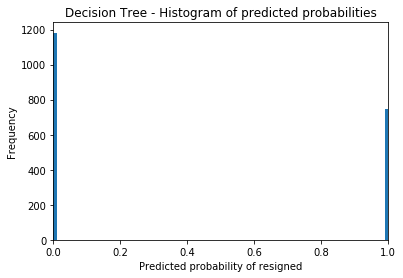

In [106]:
dtree_pred_prob = dtree.predict_proba(X_test)[:, 1]
plt.hist(dtree_pred_prob, bins=100)
plt.xlim(0, 1)
plt.title('Decision Tree - Histogram of predicted probabilities')
plt.xlabel('Predicted probability of resigned')
plt.ylabel('Frequency')

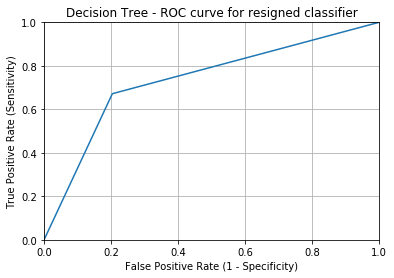

In [107]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, dtree_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Decision Tree - ROC curve for resigned classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [108]:
cross_val_score(dtree, X, y, cv=10, scoring='roc_auc').mean()

0.59691275478296391

## Random Forest

In [109]:
rfc = RandomForestClassifier(n_estimators=400)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       0.85      0.87      0.86      1172
          1       0.79      0.76      0.77       759

avg / total       0.82      0.82      0.82      1931

[[1017  155]
 [ 183  576]]


Text(0,0.5,'Frequency')

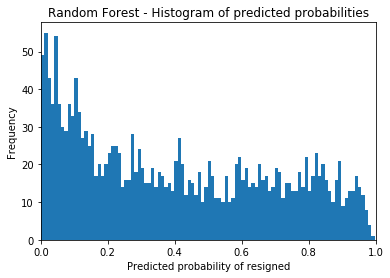

In [110]:
rfc_pred_prob = rfc.predict_proba(X_test)[:, 1]
plt.hist(rfc_pred_prob, bins=100)
plt.xlim(0, 1)
plt.title('Random Forest - Histogram of predicted probabilities')
plt.xlabel('Predicted probability of resigned')
plt.ylabel('Frequency')

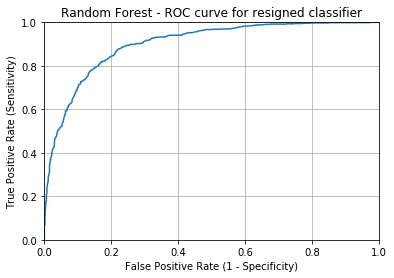

In [111]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, rfc_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Random Forest - ROC curve for resigned classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [112]:
cross_val_score(rfc, X, y, cv=10, scoring='roc_auc').mean()

0.80355191041450524

## Logistic Regression

In [113]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)

print(acc_log)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

74.45
             precision    recall  f1-score   support

          0       0.80      0.78      0.79      1172
          1       0.68      0.70      0.69       759

avg / total       0.75      0.75      0.75      1931

[[916 256]
 [227 532]]


Text(0,0.5,'Frequency')

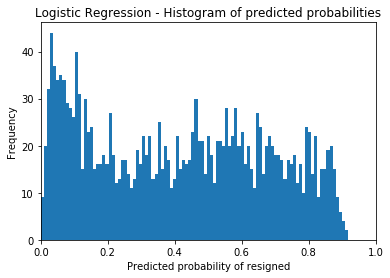

In [114]:
logreg_pred_prob = logreg.predict_proba(X_test)[:, 1]
plt.hist(logreg_pred_prob, bins=100)
plt.xlim(0, 1)
plt.title('Logistic Regression - Histogram of predicted probabilities')
plt.xlabel('Predicted probability of resigned')
plt.ylabel('Frequency')

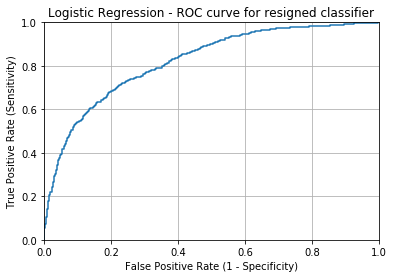

In [115]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, logreg_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Logistic Regression - ROC curve for resigned classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [116]:
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.82568203643357629

In [117]:
coeff_df = pd.DataFrame(MAIN.columns.delete(0))
coeff_df.columns = ['Resigned']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Resigned,Correlation
6,SUP Age at Action,1.253078
3,Age at Action,0.872808
11,Is STEM,0.569505
10,House Loan,0.269442
0,Resigned,0.263805
18,VAC_Vacation,0.139108
21,Year After Grad,0.038749
5,SUP Exp at Action,0.011300
15,VAC_Others,0.008890
12,MAX Degree,0.005830


## SVC

In [118]:
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)

print(acc_svc)
print(classification_report(y_test,svc_pred))
print(confusion_matrix(y_test,svc_pred))

90.3
             precision    recall  f1-score   support

          0       0.78      0.85      0.82      1172
          1       0.74      0.63      0.68       759

avg / total       0.76      0.77      0.76      1931

[[1000  172]
 [ 280  479]]


In [119]:
cross_val_score(svc, X, y, cv=10, scoring='roc_auc').mean()

0.73838727956339334

# Predict

In [120]:
#Import data to be predicted
PREDICT_MASTER = pd.read_csv('TEST_JUL2018_ACTIVE.csv')

In [121]:
PREDICT = PREDICT_MASTER.copy()
                          
PREDICT

,Serial Number,BSC Indicator,Resigned,Last Action Date,Is Re-Entry,Exp at Action,Age at Action,Is MPT,SUP Exp at Action,SUP Age at Action,SUP Is MPT,Is SUP,EDU Allowance,House Loan,Is STEM,MAX Degree,VAC_DependentCare,VAC_Maternity,VAC_Others,VAC_Personal,VAC_Sick,VAC_Vacation,Is EMP_SUP Same Gender,EMP Gender,Year After Grad,SUP Older Than EMP,Age Diff SUPvsEMP,Has SUP,Is SUP Male,Is SUP Female
0,357,1,0,2017-06-01,0,37.492899,59.038357,1,32.684933,58.953426,1.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.000000,1.000000,1.000000,1.804453,1,1,38.358906,1,-0.084932,1,0,1
1,368,0,0,2018-06-01,0,37.084950,60.126026,1,8.838356,35.438354,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.000000,1.333333,1.541667,2.160377,0,0,38.194519,1,-24.687672,1,0,1
2,371,0,0,2016-01-01,0,37.249225,59.290409,1,32.767124,57.868492,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.250000,0.000000,6.666667,1.297030,1,0,38.389042,1,-1.421918,1,1,0
3,378,0,0,2013-10-01,0,37.082213,57.701370,0,26.265753,46.945206,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.875000,1.000000,6.897436,1.128319,1,0,38.605480,1,-10.756165,1,1,0
4,414,0,0,2018-01-01,0,34.336092,60.126026,1,27.690411,50.369862,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,6.000000,0.000000,0.000000,1.875000,1,0,37.780823,1,-9.756165,1,1,0
5,428,1,0,2018-01-01,0,34.248479,56.531506,1,25.098631,52.284931,1.0,1.0,0.0,1.0,1.0,3.0,0.0,0.0,0.000000,2.000000,0.000000,1.385691,1,0,24.364384,1,-4.246575,1,1,0
6,437,0,0,2018-08-01,0,33.996591,60.038357,1,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.000000,0.000000,0.000000,2.083333,0,1,34.117809,0,0.000000,0,0,0
7,445,0,0,2014-10-01,0,33.744704,55.287670,1,19.263014,53.780823,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.500000,1.000000,1.750000,1.089674,1,1,12.175343,1,-1.506849,1,0,1
8,448,1,0,2017-12-01,0,33.744704,55.950684,0,14.090411,40.191780,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5.000000,0.000000,3.333333,1.210280,1,1,36.602741,1,-15.758904,1,0,1
9,449,1,0,2017-04-01,0,32.663231,55.950684,1,33.104111,56.783562,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.800000,2.000000,1.500000,1.198312,0,0,34.232876,0,0.832877,1,0,1


In [122]:
ACTUAL = PREDICT['Resigned'].copy()

ACTUAL

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
2324    0
2325    0
2326    0
2327    0
2328    0
2329    0
2330    0
2331    0
2332    0
2333    0
2334    0
2335    0
2336    0
2337    0
2338    0
2339    0
2340    0
2341    0
2342    0
2343    0
2344    0
2345    0
2346    0
2347    0
2348    0
2349    0
2350    0
2351    0
2352    0
2353    0
Name: Resigned, Length: 2354, dtype: int64

In [123]:
PREDICT = PREDICT.drop('Resigned',axis=1)

PREDICT

,Serial Number,BSC Indicator,Last Action Date,Is Re-Entry,Exp at Action,Age at Action,Is MPT,SUP Exp at Action,SUP Age at Action,SUP Is MPT,Is SUP,EDU Allowance,House Loan,Is STEM,MAX Degree,VAC_DependentCare,VAC_Maternity,VAC_Others,VAC_Personal,VAC_Sick,VAC_Vacation,Is EMP_SUP Same Gender,EMP Gender,Year After Grad,SUP Older Than EMP,Age Diff SUPvsEMP,Has SUP,Is SUP Male,Is SUP Female
0,357,1,2017-06-01,0,37.492899,59.038357,1,32.684933,58.953426,1.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.000000,1.000000,1.000000,1.804453,1,1,38.358906,1,-0.084932,1,0,1
1,368,0,2018-06-01,0,37.084950,60.126026,1,8.838356,35.438354,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.000000,1.333333,1.541667,2.160377,0,0,38.194519,1,-24.687672,1,0,1
2,371,0,2016-01-01,0,37.249225,59.290409,1,32.767124,57.868492,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.250000,0.000000,6.666667,1.297030,1,0,38.389042,1,-1.421918,1,1,0
3,378,0,2013-10-01,0,37.082213,57.701370,0,26.265753,46.945206,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.875000,1.000000,6.897436,1.128319,1,0,38.605480,1,-10.756165,1,1,0
4,414,0,2018-01-01,0,34.336092,60.126026,1,27.690411,50.369862,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,6.000000,0.000000,0.000000,1.875000,1,0,37.780823,1,-9.756165,1,1,0
5,428,1,2018-01-01,0,34.248479,56.531506,1,25.098631,52.284931,1.0,1.0,0.0,1.0,1.0,3.0,0.0,0.0,0.000000,2.000000,0.000000,1.385691,1,0,24.364384,1,-4.246575,1,1,0
6,437,0,2018-08-01,0,33.996591,60.038357,1,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.000000,0.000000,0.000000,2.083333,0,1,34.117809,0,0.000000,0,0,0
7,445,0,2014-10-01,0,33.744704,55.287670,1,19.263014,53.780823,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.500000,1.000000,1.750000,1.089674,1,1,12.175343,1,-1.506849,1,0,1
8,448,1,2017-12-01,0,33.744704,55.950684,0,14.090411,40.191780,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5.000000,0.000000,3.333333,1.210280,1,1,36.602741,1,-15.758904,1,0,1
9,449,1,2017-04-01,0,32.663231,55.950684,1,33.104111,56.783562,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.800000,2.000000,1.500000,1.198312,0,0,34.232876,0,0.832877,1,0,1


In [124]:
PREDICT.set_index('Serial Number', inplace=True)
PREDICT = PREDICT.drop('BSC Indicator',axis=1)

PREDICT

,Last Action Date,Is Re-Entry,Exp at Action,Age at Action,Is MPT,SUP Exp at Action,SUP Age at Action,SUP Is MPT,Is SUP,EDU Allowance,House Loan,Is STEM,MAX Degree,VAC_DependentCare,VAC_Maternity,VAC_Others,VAC_Personal,VAC_Sick,VAC_Vacation,Is EMP_SUP Same Gender,EMP Gender,Year After Grad,SUP Older Than EMP,Age Diff SUPvsEMP,Has SUP,Is SUP Male,Is SUP Female
Serial Number,,,,,,,,,,,,,,,,,,,,,,,,,,,
357,2017-06-01,0,37.492899,59.038357,1,32.684933,58.953426,1.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.000000,1.000000,1.000000,1.804453,1,1,38.358906,1,-0.084932,1,0,1
368,2018-06-01,0,37.084950,60.126026,1,8.838356,35.438354,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.000000,1.333333,1.541667,2.160377,0,0,38.194519,1,-24.687672,1,0,1
371,2016-01-01,0,37.249225,59.290409,1,32.767124,57.868492,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.250000,0.000000,6.666667,1.297030,1,0,38.389042,1,-1.421918,1,1,0
378,2013-10-01,0,37.082213,57.701370,0,26.265753,46.945206,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.875000,1.000000,6.897436,1.128319,1,0,38.605480,1,-10.756165,1,1,0
414,2018-01-01,0,34.336092,60.126026,1,27.690411,50.369862,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,6.000000,0.000000,0.000000,1.875000,1,0,37.780823,1,-9.756165,1,1,0
428,2018-01-01,0,34.248479,56.531506,1,25.098631,52.284931,1.0,1.0,0.0,1.0,1.0,3.0,0.0,0.0,0.000000,2.000000,0.000000,1.385691,1,0,24.364384,1,-4.246575,1,1,0
437,2018-08-01,0,33.996591,60.038357,1,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.000000,0.000000,0.000000,2.083333,0,1,34.117809,0,0.000000,0,0,0
445,2014-10-01,0,33.744704,55.287670,1,19.263014,53.780823,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.500000,1.000000,1.750000,1.089674,1,1,12.175343,1,-1.506849,1,0,1
448,2017-12-01,0,33.744704,55.950684,0,14.090411,40.191780,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5.000000,0.000000,3.333333,1.210280,1,1,36.602741,1,-15.758904,1,0,1


In [125]:
PREDICT = PREDICT.drop('Last Action Date',axis=1)

In [126]:
PREDICT.dtypes

Is Re-Entry                 int64
Exp at Action             float64
Age at Action             float64
Is MPT                      int64
SUP Exp at Action         float64
SUP Age at Action         float64
SUP Is MPT                float64
Is SUP                    float64
EDU Allowance             float64
House Loan                float64
Is STEM                   float64
MAX Degree                float64
VAC_DependentCare         float64
VAC_Maternity             float64
VAC_Others                float64
VAC_Personal              float64
VAC_Sick                  float64
VAC_Vacation              float64
Is EMP_SUP Same Gender      int64
EMP Gender                  int64
Year After Grad           float64
SUP Older Than EMP          int64
Age Diff SUPvsEMP         float64
Has SUP                     int64
Is SUP Male                 int64
Is SUP Female               int64
dtype: object

In [127]:
#Decision Tree
dtree_pred = dtree.predict(PREDICT)

dtree_pred

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [128]:
dtree_pred_prob = dtree.predict_proba(PREDICT)#[:, 1]

dtree_pred_prob

array([[ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]])

In [129]:
#Random Forest
rfc_pred = rfc.predict(PREDICT)

rfc_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [130]:
rfc_pred_prob = rfc.predict_proba(PREDICT)#[:, 1]

rfc_pred_prob

array([[ 0.94 ,  0.06 ],
       [ 0.99 ,  0.01 ],
       [ 0.965,  0.035],
       ..., 
       [ 0.185,  0.815],
       [ 0.23 ,  0.77 ],
       [ 0.35 ,  0.65 ]])

In [131]:
rfc_result = pd.DataFrame({'Predicted':rfc_pred})

rfc_result #= rfc_pred+rfc_pred_prob

,Predicted
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [132]:
rfc_prob = pd.DataFrame({'Propability':rfc_pred_prob[:, 1]})

rfc_prob #= rfc_pred+rfc_pred_prob

,Propability
0,0.0600
1,0.0100
2,0.0350
3,0.0050
4,0.0050
5,0.0500
6,0.0350
7,0.0350
8,0.0025
9,0.0175


In [133]:
rfc_result.loc[:, 'Propability'] = rfc_prob['Propability']
rfc_result

,Predicted,Propability
0,0,0.0600
1,0,0.0100
2,0,0.0350
3,0,0.0050
4,0,0.0050
5,0,0.0500
6,0,0.0350
7,0,0.0350
8,0,0.0025
9,0,0.0175


In [134]:
rfc_actual = pd.DataFrame(ACTUAL)


In [135]:
rfc_actual

,Resigned
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [136]:
rfc_result.loc[:, 'Actual'] = rfc_actual['Resigned']
rfc_result

,Predicted,Propability,Actual
0,0,0.0600,0
1,0,0.0100,0
2,0,0.0350,0
3,0,0.0050,0
4,0,0.0050,0
5,0,0.0500,0
6,0,0.0350,0
7,0,0.0350,0
8,0,0.0025,0
9,0,0.0175,0


In [137]:
rfc_result.loc[:, 'Serial Number'] = rfc_result.index + 1

rfc_result.set_index('Serial Number', inplace=True)

In [138]:
rfc_result.to_csv('PREDICTED_JUL2018_FULL.csv')

In [139]:
print(classification_report(ACTUAL,rfc_pred))
print(confusion_matrix(ACTUAL,rfc_pred))

             precision    recall  f1-score   support

          0       0.96      0.82      0.88      2267
          1       0.04      0.18      0.06        87

avg / total       0.93      0.79      0.85      2354

[[1855  412]
 [  71   16]]
